# Keras Tuner

In the following, the Keras_Tuner package is applied. This should automate the search for optimal parameters for the model. For this purpose, the input units and the number of layers are automatically calculated. After the calculation is complete, the model with the best accuracy values is output.

**Caution** the code runs for an extremely long time. I have let it run overnight.

In [22]:
#!pip install keras-tuner

You should consider upgrading via the 'c:\users\saend\anaconda3\python.exe -m pip install --upgrade pip' command.


In [23]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, Dropout, MaxPool2D
import kerastuner as kt
import time

LOG_DIR = f"{int(time.time())}"

In [30]:
def build_model(hp):
    model = keras.models.Sequential()

    model.add(Conv2D(hp.Int("input_units", min_value = 32, max_value = 128, step = 32) , (3,3), input_shape= (image_size,image_size, 4), padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2)))
    
    for i in range(hp.Int("n_layers", 1, 4)): 
        model.add(Conv2D(hp.Int("conv_{}_units".format(i), min_value = 32, max_value = 128, step = 32), (3,3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D((2,2)))
    
    
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    
    model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])
    
    return model

In [31]:
tuner = kt.RandomSearch(build_model,
                       objective = "val_accuracy",
                       max_trials = 3,
                       executions_per_trial = 3,
                       directory = LOG_DIR)

INFO:tensorflow:Reloading Oracle from 1642322999\untitled_project\oracle.json


In [32]:
tuner.search(train_generator,
            epochs = 20,
            batch_size = 64,
            validation_data = validation_generator)

Epoch 1/20
85/85 [==============================] - ETA: 1:53 - loss: 0.6813 - accuracy: 0.66 - ETA: 2:08 - loss: 1.4503 - accuracy: 0.41 - ETA: 2:08 - loss: 1.1767 - accuracy: 0.36 - ETA: 2:06 - loss: 1.0319 - accuracy: 0.50 - ETA: 2:05 - loss: 0.9557 - accuracy: 0.50 - ETA: 2:03 - loss: 0.9123 - accuracy: 0.48 - ETA: 2:01 - loss: 0.8753 - accuracy: 0.51 - ETA: 2:00 - loss: 0.8495 - accuracy: 0.51 - ETA: 1:58 - loss: 0.8291 - accuracy: 0.52 - ETA: 1:57 - loss: 0.8108 - accuracy: 0.53 - ETA: 1:55 - loss: 0.7899 - accuracy: 0.55 - ETA: 1:54 - loss: 0.7763 - accuracy: 0.56 - ETA: 1:55 - loss: 0.7704 - accuracy: 0.57 - ETA: 1:55 - loss: 0.7612 - accuracy: 0.57 - ETA: 1:55 - loss: 0.7466 - accuracy: 0.58 - ETA: 1:54 - loss: 0.7480 - accuracy: 0.58 - ETA: 1:54 - loss: 0.7397 - accuracy: 0.58 - ETA: 1:53 - loss: 0.7336 - accuracy: 0.59 - ETA: 1:52 - loss: 0.7281 - accuracy: 0.59 - ETA: 1:51 - loss: 0.7286 - accuracy: 0.58 - ETA: 1:50 - loss: 0.7261 - accuracy: 0.58 - ETA: 1:48 - loss: 0.7233

85/85 [==============================] - ETA: 3:06 - loss: 0.5405 - accuracy: 0.70 - ETA: 2:50 - loss: 0.4741 - accuracy: 0.70 - ETA: 2:44 - loss: 0.3879 - accuracy: 0.80 - ETA: 2:42 - loss: 0.3826 - accuracy: 0.77 - ETA: 2:38 - loss: 0.3626 - accuracy: 0.81 - ETA: 2:35 - loss: 0.3483 - accuracy: 0.82 - ETA: 2:32 - loss: 0.3499 - accuracy: 0.82 - ETA: 2:29 - loss: 0.3388 - accuracy: 0.83 - ETA: 2:27 - loss: 0.3271 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3236 - accuracy: 0.84 - ETA: 2:23 - loss: 0.3367 - accuracy: 0.84 - ETA: 2:20 - loss: 0.3380 - accuracy: 0.84 - ETA: 2:18 - loss: 0.3354 - accuracy: 0.84 - ETA: 2:16 - loss: 0.3336 - accuracy: 0.84 - ETA: 2:14 - loss: 0.3466 - accuracy: 0.83 - ETA: 2:12 - loss: 0.3391 - accuracy: 0.84 - ETA: 2:10 - loss: 0.3404 - accuracy: 0.84 - ETA: 2:08 - loss: 0.3494 - accuracy: 0.84 - ETA: 2:06 - loss: 0.3569 - accuracy: 0.83 - ETA: 2:04 - loss: 0.3527 - accuracy: 0.84 - ETA: 2:02 - loss: 0.3491 - accuracy: 0.84 - ETA: 2:00 - loss: 0.3550 - accuracy

85/85 [==============================] - ETA: 3:03 - loss: 0.3145 - accuracy: 0.85 - ETA: 2:53 - loss: 0.2654 - accuracy: 0.90 - ETA: 2:46 - loss: 0.2506 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2333 - accuracy: 0.91 - ETA: 2:38 - loss: 0.3168 - accuracy: 0.84 - ETA: 2:34 - loss: 0.3238 - accuracy: 0.84 - ETA: 2:32 - loss: 0.3495 - accuracy: 0.83 - ETA: 2:30 - loss: 0.3551 - accuracy: 0.83 - ETA: 2:18 - loss: 0.3560 - accuracy: 0.83 - ETA: 2:18 - loss: 0.3650 - accuracy: 0.84 - ETA: 2:18 - loss: 0.3498 - accuracy: 0.85 - ETA: 2:17 - loss: 0.3351 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3304 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3252 - accuracy: 0.86 - ETA: 2:11 - loss: 0.3232 - accuracy: 0.86 - ETA: 2:09 - loss: 0.3240 - accuracy: 0.86 - ETA: 2:07 - loss: 0.3182 - accuracy: 0.86 - ETA: 2:05 - loss: 0.3201 - accuracy: 0.87 - ETA: 2:04 - loss: 0.3183 - accuracy: 0.87 - ETA: 2:03 - loss: 0.3102 - accuracy: 0.87 - ETA: 2:01 - loss: 0.3044 - accuracy: 0.88 - ETA: 1:59 - loss: 0.3091 - accuracy

85/85 [==============================] - ETA: 3:21 - loss: 0.3623 - accuracy: 0.85 - ETA: 2:51 - loss: 0.2643 - accuracy: 0.92 - ETA: 2:45 - loss: 0.2907 - accuracy: 0.90 - ETA: 2:42 - loss: 0.3895 - accuracy: 0.88 - ETA: 2:38 - loss: 0.3639 - accuracy: 0.89 - ETA: 2:34 - loss: 0.3114 - accuracy: 0.90 - ETA: 2:31 - loss: 0.3488 - accuracy: 0.87 - ETA: 2:28 - loss: 0.3256 - accuracy: 0.87 - ETA: 2:26 - loss: 0.3049 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2953 - accuracy: 0.88 - ETA: 2:22 - loss: 0.2905 - accuracy: 0.88 - ETA: 2:13 - loss: 0.3027 - accuracy: 0.88 - ETA: 2:11 - loss: 0.3086 - accuracy: 0.87 - ETA: 2:10 - loss: 0.3068 - accuracy: 0.87 - ETA: 2:08 - loss: 0.3218 - accuracy: 0.87 - ETA: 2:06 - loss: 0.3288 - accuracy: 0.86 - ETA: 2:05 - loss: 0.3217 - accuracy: 0.86 - ETA: 2:03 - loss: 0.3259 - accuracy: 0.85 - ETA: 2:01 - loss: 0.3217 - accuracy: 0.85 - ETA: 1:59 - loss: 0.3202 - accuracy: 0.86 - ETA: 1:58 - loss: 0.3198 - accuracy: 0.86 - ETA: 1:56 - loss: 0.3128 - accuracy

85/85 [==============================] - ETA: 3:34 - loss: 0.0285 - accuracy: 1.00 - ETA: 3:01 - loss: 0.0808 - accuracy: 0.97 - ETA: 2:58 - loss: 0.0697 - accuracy: 0.98 - ETA: 2:26 - loss: 0.0607 - accuracy: 0.98 - ETA: 2:32 - loss: 0.0825 - accuracy: 0.96 - ETA: 2:34 - loss: 0.0929 - accuracy: 0.96 - ETA: 2:34 - loss: 0.1010 - accuracy: 0.96 - ETA: 2:33 - loss: 0.1132 - accuracy: 0.95 - ETA: 2:32 - loss: 0.1489 - accuracy: 0.94 - ETA: 2:31 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:29 - loss: 0.1364 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1273 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1214 - accuracy: 0.95 - ETA: 2:24 - loss: 0.1220 - accuracy: 0.95 - ETA: 2:22 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1378 - accuracy: 0.95 - ETA: 2:18 - loss: 0.1344 - accuracy: 0.95 - ETA: 2:16 - loss: 0.1295 - accuracy: 0.95 - ETA: 2:14 - loss: 0.1295 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1416 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1388 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1399 - accuracy

85/85 [==============================] - ETA: 2:49 - loss: 0.1193 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1107 - accuracy: 0.95 - ETA: 2:33 - loss: 0.1039 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1542 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1386 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1320 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1249 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1131 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1341 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1279 - accuracy: 0.95 - ETA: 2:25 - loss: 0.1290 - accuracy: 0.95 - ETA: 2:24 - loss: 0.1272 - accuracy: 0.95 - ETA: 2:22 - loss: 0.1216 - accuracy: 0.95 - ETA: 2:20 - loss: 0.1167 - accuracy: 0.95 - ETA: 2:19 - loss: 0.1117 - accuracy: 0.96 - ETA: 2:17 - loss: 0.1108 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1095 - accuracy: 0.95 - ETA: 2:14 - loss: 0.1051 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1050 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1029 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1015 - accuracy: 0.95 - ETA: 2:07 - loss: 0.1083 - accuracy

85/85 [==============================] - ETA: 3:20 - loss: 0.0522 - accuracy: 1.00 - ETA: 3:00 - loss: 0.0302 - accuracy: 1.00 - ETA: 2:57 - loss: 0.0264 - accuracy: 1.00 - ETA: 2:54 - loss: 0.0499 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0533 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0491 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0588 - accuracy: 0.97 - ETA: 2:40 - loss: 0.0590 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0578 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0604 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0602 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0591 - accuracy: 0.97 - ETA: 2:32 - loss: 0.0604 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0603 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0600 - accuracy: 0.98 - ETA: 2:26 - loss: 0.0628 - accuracy: 0.98 - ETA: 2:24 - loss: 0.0611 - accuracy: 0.98 - ETA: 2:22 - loss: 0.0587 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0578 - accuracy: 0.98 - ETA: 2:17 - loss: 0.0562 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0583 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0577 - accuracy

85/85 [==============================] - ETA: 2:50 - loss: 0.0520 - accuracy: 0.95 - ETA: 2:34 - loss: 0.0469 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0765 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0948 - accuracy: 0.95 - ETA: 2:28 - loss: 0.0783 - accuracy: 0.96 - ETA: 2:11 - loss: 0.0801 - accuracy: 0.96 - ETA: 2:13 - loss: 0.0689 - accuracy: 0.96 - ETA: 2:13 - loss: 0.0644 - accuracy: 0.97 - ETA: 2:12 - loss: 0.0614 - accuracy: 0.97 - ETA: 2:12 - loss: 0.0595 - accuracy: 0.97 - ETA: 2:11 - loss: 0.0586 - accuracy: 0.98 - ETA: 2:10 - loss: 0.0545 - accuracy: 0.98 - ETA: 2:09 - loss: 0.0547 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0530 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0510 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0571 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0544 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0510 - accuracy: 0.98 - ETA: 1:54 - loss: 0.0495 - accuracy

85/85 [==============================] - ETA: 2:55 - loss: 0.0178 - accuracy: 1.00 - ETA: 2:32 - loss: 0.0138 - accuracy: 1.00 - ETA: 2:34 - loss: 0.0517 - accuracy: 0.96 - ETA: 2:35 - loss: 0.0504 - accuracy: 0.96 - ETA: 2:36 - loss: 0.0411 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0676 - accuracy: 0.95 - ETA: 2:35 - loss: 0.0599 - accuracy: 0.96 - ETA: 2:32 - loss: 0.0552 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0525 - accuracy: 0.97 - ETA: 2:29 - loss: 0.0506 - accuracy: 0.97 - ETA: 2:27 - loss: 0.0465 - accuracy: 0.97 - ETA: 2:25 - loss: 0.0431 - accuracy: 0.97 - ETA: 2:24 - loss: 0.0717 - accuracy: 0.97 - ETA: 2:22 - loss: 0.0676 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0645 - accuracy: 0.97 - ETA: 2:17 - loss: 0.0634 - accuracy: 0.97 - ETA: 2:14 - loss: 0.0705 - accuracy: 0.97 - ETA: 2:12 - loss: 0.0672 - accuracy: 0.97 - ETA: 2:10 - loss: 0.0652 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0629 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0602 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0583 - accuracy

85/85 [==============================] - ETA: 3:08 - loss: 0.0042 - accuracy: 1.00 - ETA: 2:45 - loss: 0.0027 - accuracy: 1.00 - ETA: 2:42 - loss: 0.0093 - accuracy: 1.00 - ETA: 2:40 - loss: 0.0072 - accuracy: 1.00 - ETA: 2:36 - loss: 0.0103 - accuracy: 1.00 - ETA: 2:33 - loss: 0.0087 - accuracy: 1.00 - ETA: 2:30 - loss: 0.0079 - accuracy: 1.00 - ETA: 2:27 - loss: 0.0080 - accuracy: 1.00 - ETA: 2:25 - loss: 0.0078 - accuracy: 1.00 - ETA: 2:22 - loss: 0.0075 - accuracy: 1.00 - ETA: 2:20 - loss: 0.0077 - accuracy: 1.00 - ETA: 2:18 - loss: 0.0074 - accuracy: 1.00 - ETA: 2:16 - loss: 0.0068 - accuracy: 1.00 - ETA: 2:14 - loss: 0.0064 - accuracy: 1.00 - ETA: 2:12 - loss: 0.0069 - accuracy: 1.00 - ETA: 2:10 - loss: 0.0074 - accuracy: 1.00 - ETA: 2:08 - loss: 0.0076 - accuracy: 1.00 - ETA: 2:06 - loss: 0.0075 - accuracy: 1.00 - ETA: 2:04 - loss: 0.0080 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0080 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0080 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0079 - accuracy

85/85 [==============================] - ETA: 3:22 - loss: 0.6987 - accuracy: 0.40 - ETA: 2:36 - loss: 0.6374 - accuracy: 0.60 - ETA: 2:35 - loss: 0.6911 - accuracy: 0.65 - ETA: 2:34 - loss: 0.7822 - accuracy: 0.60 - ETA: 2:32 - loss: 0.7645 - accuracy: 0.58 - ETA: 2:30 - loss: 0.7554 - accuracy: 0.55 - ETA: 2:29 - loss: 0.7462 - accuracy: 0.55 - ETA: 2:27 - loss: 0.7395 - accuracy: 0.53 - ETA: 2:25 - loss: 0.7332 - accuracy: 0.56 - ETA: 2:23 - loss: 0.7296 - accuracy: 0.56 - ETA: 2:21 - loss: 0.7234 - accuracy: 0.56 - ETA: 2:19 - loss: 0.7150 - accuracy: 0.57 - ETA: 2:17 - loss: 0.7008 - accuracy: 0.59 - ETA: 2:15 - loss: 0.7070 - accuracy: 0.59 - ETA: 2:13 - loss: 0.7076 - accuracy: 0.59 - ETA: 2:11 - loss: 0.7077 - accuracy: 0.59 - ETA: 2:09 - loss: 0.7058 - accuracy: 0.59 - ETA: 2:07 - loss: 0.7058 - accuracy: 0.58 - ETA: 2:05 - loss: 0.7042 - accuracy: 0.58 - ETA: 2:03 - loss: 0.7022 - accuracy: 0.59 - ETA: 1:58 - loss: 0.7017 - accuracy: 0.59 - ETA: 1:56 - loss: 0.7004 - accuracy

85/85 [==============================] - ETA: 2:54 - loss: 0.2074 - accuracy: 0.95 - ETA: 2:35 - loss: 0.3348 - accuracy: 0.80 - ETA: 2:33 - loss: 0.3833 - accuracy: 0.80 - ETA: 2:31 - loss: 0.3704 - accuracy: 0.81 - ETA: 2:29 - loss: 0.4062 - accuracy: 0.79 - ETA: 2:27 - loss: 0.3840 - accuracy: 0.80 - ETA: 2:26 - loss: 0.3878 - accuracy: 0.79 - ETA: 2:23 - loss: 0.3932 - accuracy: 0.79 - ETA: 2:22 - loss: 0.3920 - accuracy: 0.79 - ETA: 2:20 - loss: 0.3840 - accuracy: 0.81 - ETA: 2:18 - loss: 0.3842 - accuracy: 0.81 - ETA: 2:16 - loss: 0.3790 - accuracy: 0.81 - ETA: 2:14 - loss: 0.3778 - accuracy: 0.81 - ETA: 2:12 - loss: 0.3830 - accuracy: 0.82 - ETA: 2:10 - loss: 0.3803 - accuracy: 0.82 - ETA: 2:08 - loss: 0.3791 - accuracy: 0.82 - ETA: 2:07 - loss: 0.3691 - accuracy: 0.83 - ETA: 2:05 - loss: 0.3625 - accuracy: 0.83 - ETA: 2:03 - loss: 0.3635 - accuracy: 0.83 - ETA: 2:01 - loss: 0.3682 - accuracy: 0.83 - ETA: 1:59 - loss: 0.3623 - accuracy: 0.83 - ETA: 1:57 - loss: 0.3520 - accuracy

85/85 [==============================] - ETA: 2:58 - loss: 0.1093 - accuracy: 1.00 - ETA: 2:43 - loss: 0.1863 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2162 - accuracy: 0.88 - ETA: 2:40 - loss: 0.1888 - accuracy: 0.91 - ETA: 2:39 - loss: 0.2222 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2226 - accuracy: 0.88 - ETA: 2:35 - loss: 0.2282 - accuracy: 0.88 - ETA: 2:33 - loss: 0.2335 - accuracy: 0.88 - ETA: 2:30 - loss: 0.2431 - accuracy: 0.88 - ETA: 2:28 - loss: 0.2629 - accuracy: 0.88 - ETA: 2:27 - loss: 0.2625 - accuracy: 0.87 - ETA: 2:25 - loss: 0.2518 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2398 - accuracy: 0.88 - ETA: 2:22 - loss: 0.2332 - accuracy: 0.89 - ETA: 2:20 - loss: 0.2465 - accuracy: 0.89 - ETA: 2:19 - loss: 0.2619 - accuracy: 0.88 - ETA: 2:17 - loss: 0.2584 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2608 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2516 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2528 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2479 - accuracy

85/85 [==============================] - ETA: 2:48 - loss: 0.3360 - accuracy: 0.90 - ETA: 2:34 - loss: 0.2817 - accuracy: 0.87 - ETA: 2:32 - loss: 0.2186 - accuracy: 0.90 - ETA: 2:30 - loss: 0.2338 - accuracy: 0.90 - ETA: 2:29 - loss: 0.2304 - accuracy: 0.88 - ETA: 2:26 - loss: 0.2465 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2255 - accuracy: 0.89 - ETA: 2:23 - loss: 0.2317 - accuracy: 0.90 - ETA: 2:21 - loss: 0.2277 - accuracy: 0.90 - ETA: 2:19 - loss: 0.2349 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2270 - accuracy: 0.90 - ETA: 2:15 - loss: 0.2191 - accuracy: 0.90 - ETA: 2:14 - loss: 0.2147 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2114 - accuracy: 0.91 - ETA: 2:10 - loss: 0.2197 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2339 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2308 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2316 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2293 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:57 - loss: 0.2303 - accuracy

85/85 [==============================] - ETA: 2:47 - loss: 0.1157 - accuracy: 0.90 - ETA: 2:33 - loss: 0.1800 - accuracy: 0.87 - ETA: 2:33 - loss: 0.2177 - accuracy: 0.85 - ETA: 2:31 - loss: 0.2473 - accuracy: 0.85 - ETA: 2:29 - loss: 0.2312 - accuracy: 0.87 - ETA: 2:27 - loss: 0.1966 - accuracy: 0.89 - ETA: 2:25 - loss: 0.1931 - accuracy: 0.90 - ETA: 2:23 - loss: 0.1780 - accuracy: 0.91 - ETA: 2:22 - loss: 0.1970 - accuracy: 0.90 - ETA: 2:20 - loss: 0.1879 - accuracy: 0.91 - ETA: 2:18 - loss: 0.1986 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2026 - accuracy: 0.90 - ETA: 2:15 - loss: 0.2006 - accuracy: 0.90 - ETA: 2:13 - loss: 0.1957 - accuracy: 0.90 - ETA: 2:10 - loss: 0.1901 - accuracy: 0.91 - ETA: 2:09 - loss: 0.1960 - accuracy: 0.90 - ETA: 2:07 - loss: 0.1920 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2052 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2110 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2105 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2118 - accuracy: 0.89 - ETA: 1:57 - loss: 0.2094 - accuracy

85/85 [==============================] - ETA: 2:47 - loss: 0.1469 - accuracy: 0.95 - ETA: 2:33 - loss: 0.1035 - accuracy: 0.97 - ETA: 2:31 - loss: 0.1271 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1394 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1717 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1604 - accuracy: 0.95 - ETA: 2:24 - loss: 0.1609 - accuracy: 0.95 - ETA: 2:23 - loss: 0.1826 - accuracy: 0.93 - ETA: 2:21 - loss: 0.1709 - accuracy: 0.94 - ETA: 2:19 - loss: 0.1622 - accuracy: 0.94 - ETA: 2:17 - loss: 0.1671 - accuracy: 0.94 - ETA: 2:16 - loss: 0.1653 - accuracy: 0.94 - ETA: 2:14 - loss: 0.1597 - accuracy: 0.94 - ETA: 2:12 - loss: 0.1553 - accuracy: 0.94 - ETA: 2:10 - loss: 0.1532 - accuracy: 0.94 - ETA: 2:08 - loss: 0.1459 - accuracy: 0.95 - ETA: 2:06 - loss: 0.1430 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1383 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1340 - accuracy: 0.95 - ETA: 2:01 - loss: 0.1412 - accuracy: 0.95 - ETA: 2:00 - loss: 0.1408 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1465 - accuracy

85/85 [==============================] - ETA: 2:51 - loss: 0.0560 - accuracy: 1.00 - ETA: 1:14 - loss: 0.0653 - accuracy: 1.00 - ETA: 1:53 - loss: 0.1864 - accuracy: 0.91 - ETA: 2:04 - loss: 0.1628 - accuracy: 0.92 - ETA: 2:09 - loss: 0.1400 - accuracy: 0.94 - ETA: 2:11 - loss: 0.1327 - accuracy: 0.94 - ETA: 2:12 - loss: 0.1467 - accuracy: 0.93 - ETA: 2:13 - loss: 0.1814 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1715 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1550 - accuracy: 0.93 - ETA: 2:10 - loss: 0.1498 - accuracy: 0.93 - ETA: 2:09 - loss: 0.1428 - accuracy: 0.93 - ETA: 2:08 - loss: 0.1588 - accuracy: 0.93 - ETA: 2:07 - loss: 0.1754 - accuracy: 0.93 - ETA: 2:05 - loss: 0.1702 - accuracy: 0.93 - ETA: 2:04 - loss: 0.1673 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1827 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1801 - accuracy: 0.93 - ETA: 1:57 - loss: 0.1766 - accuracy: 0.93 - ETA: 1:56 - loss: 0.1780 - accuracy: 0.93 - ETA: 1:54 - loss: 0.1733 - accuracy

85/85 [==============================] - ETA: 1:19 - loss: 0.1592 - accuracy: 1.00 - ETA: 2:34 - loss: 0.0668 - accuracy: 1.00 - ETA: 2:32 - loss: 0.0436 - accuracy: 1.00 - ETA: 2:30 - loss: 0.0453 - accuracy: 1.00 - ETA: 2:28 - loss: 0.0387 - accuracy: 1.00 - ETA: 2:26 - loss: 0.0661 - accuracy: 0.98 - ETA: 2:24 - loss: 0.0718 - accuracy: 0.97 - ETA: 2:23 - loss: 0.1357 - accuracy: 0.95 - ETA: 2:21 - loss: 0.1419 - accuracy: 0.95 - ETA: 2:19 - loss: 0.1718 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1609 - accuracy: 0.94 - ETA: 2:16 - loss: 0.1521 - accuracy: 0.94 - ETA: 2:14 - loss: 0.1428 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1399 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1390 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1439 - accuracy: 0.95 - ETA: 2:06 - loss: 0.1422 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1398 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1452 - accuracy: 0.95 - ETA: 2:01 - loss: 0.1426 - accuracy: 0.95 - ETA: 1:59 - loss: 0.1365 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1363 - accuracy

85/85 [==============================] - ETA: 2:46 - loss: 9.3138e-04 - accuracy: 1.00 - ETA: 2:32 - loss: 0.0087 - accuracy: 1.0000   - ETA: 2:32 - loss: 0.0611 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0578 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0464 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0441 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0436 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0392 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0491 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:18 - loss: 0.0479 - accuracy: 0.98 - ETA: 2:16 - loss: 0.0568 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0569 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0533 - accuracy: 0.98 - ETA: 2:10 - loss: 0.0503 - accuracy: 0.98 - ETA: 2:08 - loss: 0.0484 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0523 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0498 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0494 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0478 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0495 - accuracy: 0.98 - ETA: 1:54 - loss: 0.0510 - 

85/85 [==============================] - ETA: 2:44 - loss: 0.0180 - accuracy: 1.00 - ETA: 2:37 - loss: 0.0495 - accuracy: 1.00 - ETA: 2:34 - loss: 0.1476 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1180 - accuracy: 0.97 - ETA: 2:30 - loss: 0.1103 - accuracy: 0.97 - ETA: 2:29 - loss: 0.1104 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1117 - accuracy: 0.96 - ETA: 2:25 - loss: 0.1014 - accuracy: 0.96 - ETA: 2:23 - loss: 0.0966 - accuracy: 0.97 - ETA: 2:21 - loss: 0.0928 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0866 - accuracy: 0.97 - ETA: 2:17 - loss: 0.0811 - accuracy: 0.97 - ETA: 2:15 - loss: 0.0842 - accuracy: 0.97 - ETA: 2:13 - loss: 0.0836 - accuracy: 0.97 - ETA: 2:11 - loss: 0.0782 - accuracy: 0.98 - ETA: 2:09 - loss: 0.0762 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0753 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0769 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:02 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:00 - loss: 0.0744 - accuracy: 0.97 - ETA: 1:58 - loss: 0.0723 - accuracy

85/85 [==============================] - ETA: 3:53 - loss: 0.6939 - accuracy: 0.55 - ETA: 2:44 - loss: 0.8355 - accuracy: 0.55 - ETA: 2:42 - loss: 0.7889 - accuracy: 0.53 - ETA: 2:40 - loss: 0.7662 - accuracy: 0.50 - ETA: 2:39 - loss: 0.7513 - accuracy: 0.54 - ETA: 2:37 - loss: 0.7414 - accuracy: 0.53 - ETA: 2:33 - loss: 0.7388 - accuracy: 0.49 - ETA: 2:31 - loss: 0.7325 - accuracy: 0.50 - ETA: 2:29 - loss: 0.7305 - accuracy: 0.48 - ETA: 2:27 - loss: 0.7258 - accuracy: 0.49 - ETA: 2:25 - loss: 0.7234 - accuracy: 0.49 - ETA: 2:23 - loss: 0.7197 - accuracy: 0.50 - ETA: 2:21 - loss: 0.7159 - accuracy: 0.51 - ETA: 2:18 - loss: 0.7140 - accuracy: 0.51 - ETA: 2:16 - loss: 0.7101 - accuracy: 0.52 - ETA: 2:14 - loss: 0.7059 - accuracy: 0.53 - ETA: 2:12 - loss: 0.7010 - accuracy: 0.54 - ETA: 2:10 - loss: 0.6907 - accuracy: 0.55 - ETA: 2:07 - loss: 0.6826 - accuracy: 0.56 - ETA: 2:05 - loss: 0.6847 - accuracy: 0.56 - ETA: 2:03 - loss: 0.6788 - accuracy: 0.57 - ETA: 2:01 - loss: 0.6894 - accuracy

85/85 [==============================] - ETA: 2:50 - loss: 0.3178 - accuracy: 0.85 - ETA: 2:36 - loss: 0.5281 - accuracy: 0.75 - ETA: 2:33 - loss: 0.4278 - accuracy: 0.81 - ETA: 2:32 - loss: 0.3909 - accuracy: 0.83 - ETA: 2:30 - loss: 0.3710 - accuracy: 0.86 - ETA: 2:28 - loss: 0.4173 - accuracy: 0.82 - ETA: 2:27 - loss: 0.3852 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3823 - accuracy: 0.84 - ETA: 2:23 - loss: 0.3712 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3671 - accuracy: 0.84 - ETA: 2:19 - loss: 0.3647 - accuracy: 0.85 - ETA: 2:17 - loss: 0.3623 - accuracy: 0.85 - ETA: 2:15 - loss: 0.3613 - accuracy: 0.85 - ETA: 2:13 - loss: 0.3574 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3544 - accuracy: 0.86 - ETA: 2:05 - loss: 0.3556 - accuracy: 0.85 - ETA: 2:04 - loss: 0.3560 - accuracy: 0.85 - ETA: 2:02 - loss: 0.3531 - accuracy: 0.84 - ETA: 2:00 - loss: 0.3509 - accuracy: 0.84 - ETA: 1:59 - loss: 0.3632 - accuracy: 0.84 - ETA: 1:57 - loss: 0.3611 - accuracy: 0.84 - ETA: 1:56 - loss: 0.3662 - accuracy

85/85 [==============================] - ETA: 2:49 - loss: 0.2005 - accuracy: 0.90 - ETA: 2:35 - loss: 0.2725 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3210 - accuracy: 0.86 - ETA: 2:32 - loss: 0.3051 - accuracy: 0.87 - ETA: 2:30 - loss: 0.3195 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3004 - accuracy: 0.88 - ETA: 2:26 - loss: 0.2929 - accuracy: 0.88 - ETA: 2:24 - loss: 0.2799 - accuracy: 0.89 - ETA: 2:23 - loss: 0.2773 - accuracy: 0.88 - ETA: 2:21 - loss: 0.2802 - accuracy: 0.89 - ETA: 2:19 - loss: 0.2782 - accuracy: 0.89 - ETA: 2:17 - loss: 0.2845 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2837 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2812 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2769 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2697 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2689 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2572 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2509 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2458 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2451 - accuracy: 0.90 - ETA: 1:58 - loss: 0.2447 - accuracy

85/85 [==============================] - ETA: 2:48 - loss: 0.1717 - accuracy: 0.90 - ETA: 2:35 - loss: 0.1856 - accuracy: 0.90 - ETA: 2:34 - loss: 0.1500 - accuracy: 0.93 - ETA: 2:32 - loss: 0.1524 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1594 - accuracy: 0.94 - ETA: 2:29 - loss: 0.1768 - accuracy: 0.92 - ETA: 2:27 - loss: 0.1634 - accuracy: 0.92 - ETA: 2:26 - loss: 0.1571 - accuracy: 0.93 - ETA: 2:24 - loss: 0.1706 - accuracy: 0.92 - ETA: 2:21 - loss: 0.1707 - accuracy: 0.92 - ETA: 2:20 - loss: 0.1822 - accuracy: 0.92 - ETA: 2:17 - loss: 0.1782 - accuracy: 0.92 - ETA: 2:15 - loss: 0.1922 - accuracy: 0.91 - ETA: 2:14 - loss: 0.2003 - accuracy: 0.91 - ETA: 2:12 - loss: 0.1911 - accuracy: 0.92 - ETA: 2:10 - loss: 0.1833 - accuracy: 0.92 - ETA: 2:08 - loss: 0.1849 - accuracy: 0.92 - ETA: 2:06 - loss: 0.1829 - accuracy: 0.93 - ETA: 2:04 - loss: 0.1938 - accuracy: 0.92 - ETA: 2:02 - loss: 0.1885 - accuracy: 0.92 - ETA: 2:00 - loss: 0.1889 - accuracy: 0.92 - ETA: 1:58 - loss: 0.1840 - accuracy

85/85 [==============================] - ETA: 2:49 - loss: 0.3551 - accuracy: 0.85 - ETA: 2:37 - loss: 0.3212 - accuracy: 0.87 - ETA: 2:36 - loss: 0.2733 - accuracy: 0.90 - ETA: 2:33 - loss: 0.2409 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2137 - accuracy: 0.93 - ETA: 2:28 - loss: 0.2030 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1872 - accuracy: 0.94 - ETA: 2:24 - loss: 0.1829 - accuracy: 0.94 - ETA: 2:22 - loss: 0.1822 - accuracy: 0.94 - ETA: 2:20 - loss: 0.2118 - accuracy: 0.94 - ETA: 2:18 - loss: 0.2023 - accuracy: 0.94 - ETA: 2:16 - loss: 0.1938 - accuracy: 0.94 - ETA: 2:14 - loss: 0.1883 - accuracy: 0.94 - ETA: 2:13 - loss: 0.1835 - accuracy: 0.93 - ETA: 2:11 - loss: 0.1758 - accuracy: 0.94 - ETA: 2:09 - loss: 0.1685 - accuracy: 0.94 - ETA: 2:07 - loss: 0.1765 - accuracy: 0.94 - ETA: 2:05 - loss: 0.1738 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1737 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1793 - accuracy: 0.94 - ETA: 1:59 - loss: 0.1875 - accuracy: 0.93 - ETA: 1:57 - loss: 0.1844 - accuracy

85/85 [==============================] - ETA: 2:51 - loss: 0.2282 - accuracy: 0.90 - ETA: 2:32 - loss: 0.1564 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1193 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1081 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1310 - accuracy: 0.95 - ETA: 2:27 - loss: 0.1410 - accuracy: 0.94 - ETA: 2:25 - loss: 0.1391 - accuracy: 0.94 - ETA: 2:23 - loss: 0.1387 - accuracy: 0.94 - ETA: 2:21 - loss: 0.1552 - accuracy: 0.93 - ETA: 2:20 - loss: 0.1575 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1592 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1472 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1365 - accuracy: 0.94 - ETA: 2:13 - loss: 0.1279 - accuracy: 0.94 - ETA: 2:11 - loss: 0.1413 - accuracy: 0.94 - ETA: 2:09 - loss: 0.1386 - accuracy: 0.94 - ETA: 2:07 - loss: 0.1316 - accuracy: 0.94 - ETA: 2:05 - loss: 0.1315 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1360 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1298 - accuracy: 0.95 - ETA: 2:00 - loss: 0.1391 - accuracy: 0.94 - ETA: 1:58 - loss: 0.1351 - accuracy

85/85 [==============================] - ETA: 2:46 - loss: 0.0348 - accuracy: 1.00 - ETA: 2:33 - loss: 0.0679 - accuracy: 0.97 - ETA: 2:33 - loss: 0.1334 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1393 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1597 - accuracy: 0.93 - ETA: 2:27 - loss: 0.1480 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1359 - accuracy: 0.94 - ETA: 2:24 - loss: 0.1362 - accuracy: 0.94 - ETA: 2:22 - loss: 0.1401 - accuracy: 0.94 - ETA: 2:20 - loss: 0.1350 - accuracy: 0.95 - ETA: 2:18 - loss: 0.1346 - accuracy: 0.95 - ETA: 2:17 - loss: 0.1324 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1443 - accuracy: 0.94 - ETA: 2:13 - loss: 0.1388 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1461 - accuracy: 0.94 - ETA: 2:09 - loss: 0.1424 - accuracy: 0.94 - ETA: 2:07 - loss: 0.1372 - accuracy: 0.94 - ETA: 2:05 - loss: 0.1412 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1359 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1297 - accuracy: 0.94 - ETA: 1:59 - loss: 0.1265 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1314 - accuracy

85/85 [==============================] - ETA: 2:50 - loss: 0.0303 - accuracy: 1.00 - ETA: 2:33 - loss: 0.0290 - accuracy: 1.00 - ETA: 2:32 - loss: 0.0529 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0620 - accuracy: 0.97 - ETA: 2:09 - loss: 0.0580 - accuracy: 0.97 - ETA: 2:13 - loss: 0.0492 - accuracy: 0.98 - ETA: 2:15 - loss: 0.0833 - accuracy: 0.97 - ETA: 2:15 - loss: 0.0944 - accuracy: 0.96 - ETA: 2:14 - loss: 0.0890 - accuracy: 0.97 - ETA: 2:13 - loss: 0.0864 - accuracy: 0.96 - ETA: 2:12 - loss: 0.0808 - accuracy: 0.97 - ETA: 2:11 - loss: 0.0767 - accuracy: 0.97 - ETA: 2:09 - loss: 0.0785 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0765 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0740 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0768 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0789 - accuracy: 0.97 - ETA: 2:01 - loss: 0.0767 - accuracy: 0.97 - ETA: 2:00 - loss: 0.0768 - accuracy: 0.97 - ETA: 1:58 - loss: 0.0861 - accuracy: 0.96 - ETA: 1:56 - loss: 0.0913 - accuracy: 0.96 - ETA: 1:55 - loss: 0.0895 - accuracy

85/85 [==============================] - ETA: 2:47 - loss: 0.1172 - accuracy: 0.95 - ETA: 2:36 - loss: 0.0719 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0709 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0606 - accuracy: 0.97 - ETA: 2:29 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0783 - accuracy: 0.96 - ETA: 2:25 - loss: 0.0741 - accuracy: 0.97 - ETA: 2:23 - loss: 0.0773 - accuracy: 0.96 - ETA: 2:21 - loss: 0.0754 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0784 - accuracy: 0.97 - ETA: 2:17 - loss: 0.0754 - accuracy: 0.97 - ETA: 2:15 - loss: 0.0708 - accuracy: 0.97 - ETA: 2:14 - loss: 0.0700 - accuracy: 0.97 - ETA: 2:12 - loss: 0.0677 - accuracy: 0.97 - ETA: 2:10 - loss: 0.0722 - accuracy: 0.97 - ETA: 2:08 - loss: 0.0702 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0677 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0645 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0750 - accuracy: 0.97 - ETA: 1:59 - loss: 0.0751 - accuracy: 0.97 - ETA: 1:57 - loss: 0.0808 - accuracy

85/85 [==============================] - ETA: 2:45 - loss: 0.2098 - accuracy: 0.90 - ETA: 2:38 - loss: 0.1190 - accuracy: 0.95 - ETA: 2:36 - loss: 0.0943 - accuracy: 0.96 - ETA: 2:35 - loss: 0.0772 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0876 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0838 - accuracy: 0.97 - ETA: 2:32 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:29 - loss: 0.0661 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0605 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0587 - accuracy: 0.98 - ETA: 2:26 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:17 - loss: 0.0517 - accuracy: 0.98 - ETA: 2:16 - loss: 0.0544 - accuracy: 0.98 - ETA: 2:15 - loss: 0.0516 - accuracy: 0.98 - ETA: 2:13 - loss: 0.0517 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0486 - accuracy: 0.98 - ETA: 2:10 - loss: 0.0530 - accuracy: 0.98 - ETA: 2:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0479 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0479 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0458 - accuracy: 0.98 - ETA: 2:00 - loss: 0.0452 - accuracy

Epoch 1/20
85/85 [==============================] - ETA: 4:07 - loss: 0.7125 - accuracy: 0.30 - ETA: 3:22 - loss: 1.1487 - accuracy: 0.37 - ETA: 3:20 - loss: 1.0121 - accuracy: 0.36 - ETA: 3:22 - loss: 0.9341 - accuracy: 0.37 - ETA: 3:18 - loss: 0.8847 - accuracy: 0.42 - ETA: 3:15 - loss: 0.8491 - accuracy: 0.45 - ETA: 3:12 - loss: 0.8180 - accuracy: 0.49 - ETA: 3:09 - loss: 0.7975 - accuracy: 0.51 - ETA: 3:06 - loss: 0.7689 - accuracy: 0.53 - ETA: 3:03 - loss: 0.7641 - accuracy: 0.54 - ETA: 3:01 - loss: 0.7498 - accuracy: 0.55 - ETA: 2:58 - loss: 0.7440 - accuracy: 0.56 - ETA: 2:55 - loss: 0.7378 - accuracy: 0.56 - ETA: 2:53 - loss: 0.7311 - accuracy: 0.57 - ETA: 2:50 - loss: 0.7238 - accuracy: 0.58 - ETA: 2:48 - loss: 0.7196 - accuracy: 0.58 - ETA: 2:45 - loss: 0.7129 - accuracy: 0.59 - ETA: 2:43 - loss: 0.7077 - accuracy: 0.60 - ETA: 2:40 - loss: 0.7047 - accuracy: 0.60 - ETA: 2:38 - loss: 0.7024 - accuracy: 0.60 - ETA: 2:35 - loss: 0.7071 - accuracy: 0.59 - ETA: 2:33 - loss: 0.7042

85/85 [==============================] - ETA: 3:50 - loss: 0.2595 - accuracy: 0.85 - ETA: 3:31 - loss: 0.3748 - accuracy: 0.85 - ETA: 3:26 - loss: 0.3650 - accuracy: 0.86 - ETA: 3:22 - loss: 0.4111 - accuracy: 0.85 - ETA: 3:18 - loss: 0.3932 - accuracy: 0.84 - ETA: 3:14 - loss: 0.3997 - accuracy: 0.83 - ETA: 3:11 - loss: 0.4119 - accuracy: 0.82 - ETA: 3:08 - loss: 0.4061 - accuracy: 0.81 - ETA: 3:05 - loss: 0.4327 - accuracy: 0.79 - ETA: 3:03 - loss: 0.4555 - accuracy: 0.77 - ETA: 3:00 - loss: 0.4656 - accuracy: 0.75 - ETA: 2:58 - loss: 0.4664 - accuracy: 0.75 - ETA: 2:55 - loss: 0.4617 - accuracy: 0.76 - ETA: 2:52 - loss: 0.4649 - accuracy: 0.77 - ETA: 2:50 - loss: 0.4523 - accuracy: 0.77 - ETA: 2:47 - loss: 0.4468 - accuracy: 0.78 - ETA: 2:45 - loss: 0.4562 - accuracy: 0.77 - ETA: 2:42 - loss: 0.4481 - accuracy: 0.78 - ETA: 2:40 - loss: 0.4483 - accuracy: 0.78 - ETA: 2:38 - loss: 0.4410 - accuracy: 0.78 - ETA: 2:36 - loss: 0.4347 - accuracy: 0.79 - ETA: 2:33 - loss: 0.4269 - accuracy

85/85 [==============================] - ETA: 3:33 - loss: 0.3334 - accuracy: 0.85 - ETA: 3:24 - loss: 0.3022 - accuracy: 0.87 - ETA: 3:19 - loss: 0.3106 - accuracy: 0.86 - ETA: 3:15 - loss: 0.2937 - accuracy: 0.90 - ETA: 3:13 - loss: 0.2738 - accuracy: 0.90 - ETA: 3:11 - loss: 0.2618 - accuracy: 0.90 - ETA: 3:08 - loss: 0.2751 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2845 - accuracy: 0.88 - ETA: 3:03 - loss: 0.3106 - accuracy: 0.86 - ETA: 3:00 - loss: 0.3168 - accuracy: 0.86 - ETA: 2:58 - loss: 0.3234 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3165 - accuracy: 0.85 - ETA: 2:53 - loss: 0.3102 - accuracy: 0.86 - ETA: 2:51 - loss: 0.3060 - accuracy: 0.86 - ETA: 2:48 - loss: 0.3030 - accuracy: 0.86 - ETA: 2:46 - loss: 0.3131 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3077 - accuracy: 0.86 - ETA: 2:41 - loss: 0.3130 - accuracy: 0.85 - ETA: 2:38 - loss: 0.3063 - accuracy: 0.86 - ETA: 2:36 - loss: 0.3146 - accuracy: 0.86 - ETA: 2:33 - loss: 0.3192 - accuracy: 0.85 - ETA: 2:31 - loss: 0.3219 - accuracy

85/85 [==============================] - ETA: 3:31 - loss: 0.1743 - accuracy: 0.95 - ETA: 3:21 - loss: 0.2384 - accuracy: 0.92 - ETA: 3:18 - loss: 0.2722 - accuracy: 0.90 - ETA: 3:17 - loss: 0.2448 - accuracy: 0.92 - ETA: 3:14 - loss: 0.2454 - accuracy: 0.93 - ETA: 3:10 - loss: 0.2445 - accuracy: 0.94 - ETA: 3:08 - loss: 0.2340 - accuracy: 0.94 - ETA: 3:05 - loss: 0.2339 - accuracy: 0.93 - ETA: 3:03 - loss: 0.2423 - accuracy: 0.93 - ETA: 3:00 - loss: 0.2213 - accuracy: 0.94 - ETA: 2:58 - loss: 0.2180 - accuracy: 0.94 - ETA: 2:55 - loss: 0.2379 - accuracy: 0.93 - ETA: 2:53 - loss: 0.2396 - accuracy: 0.93 - ETA: 2:50 - loss: 0.2408 - accuracy: 0.93 - ETA: 2:48 - loss: 0.2419 - accuracy: 0.93 - ETA: 2:45 - loss: 0.2313 - accuracy: 0.93 - ETA: 2:43 - loss: 0.2320 - accuracy: 0.93 - ETA: 2:41 - loss: 0.2281 - accuracy: 0.93 - ETA: 2:38 - loss: 0.2297 - accuracy: 0.92 - ETA: 2:36 - loss: 0.2282 - accuracy: 0.92 - ETA: 2:33 - loss: 0.2354 - accuracy: 0.92 - ETA: 2:31 - loss: 0.2512 - accuracy

85/85 [==============================] - ETA: 3:29 - loss: 0.5739 - accuracy: 0.70 - ETA: 3:18 - loss: 0.5527 - accuracy: 0.70 - ETA: 3:16 - loss: 0.4440 - accuracy: 0.76 - ETA: 3:13 - loss: 0.4173 - accuracy: 0.80 - ETA: 3:10 - loss: 0.4620 - accuracy: 0.78 - ETA: 3:08 - loss: 0.4814 - accuracy: 0.77 - ETA: 3:06 - loss: 0.4479 - accuracy: 0.79 - ETA: 3:05 - loss: 0.4364 - accuracy: 0.78 - ETA: 3:03 - loss: 0.4278 - accuracy: 0.78 - ETA: 3:00 - loss: 0.4067 - accuracy: 0.80 - ETA: 2:58 - loss: 0.4043 - accuracy: 0.80 - ETA: 2:55 - loss: 0.3971 - accuracy: 0.81 - ETA: 2:52 - loss: 0.3956 - accuracy: 0.81 - ETA: 2:50 - loss: 0.3846 - accuracy: 0.81 - ETA: 2:48 - loss: 0.3696 - accuracy: 0.82 - ETA: 2:45 - loss: 0.3623 - accuracy: 0.83 - ETA: 2:43 - loss: 0.3661 - accuracy: 0.82 - ETA: 2:40 - loss: 0.3562 - accuracy: 0.83 - ETA: 2:38 - loss: 0.3486 - accuracy: 0.84 - ETA: 2:35 - loss: 0.3450 - accuracy: 0.84 - ETA: 2:33 - loss: 0.3413 - accuracy: 0.84 - ETA: 2:31 - loss: 0.3386 - accuracy

85/85 [==============================] - ETA: 4:04 - loss: 0.0494 - accuracy: 1.00 - ETA: 3:44 - loss: 0.0586 - accuracy: 1.00 - ETA: 3:32 - loss: 0.1386 - accuracy: 0.96 - ETA: 3:26 - loss: 0.1170 - accuracy: 0.97 - ETA: 3:20 - loss: 0.1023 - accuracy: 0.98 - ETA: 3:15 - loss: 0.1071 - accuracy: 0.97 - ETA: 3:12 - loss: 0.1192 - accuracy: 0.97 - ETA: 3:08 - loss: 0.1284 - accuracy: 0.96 - ETA: 3:05 - loss: 0.1173 - accuracy: 0.96 - ETA: 3:02 - loss: 0.1180 - accuracy: 0.96 - ETA: 2:59 - loss: 0.1127 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1208 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1264 - accuracy: 0.95 - ETA: 2:52 - loss: 0.1223 - accuracy: 0.95 - ETA: 2:49 - loss: 0.1306 - accuracy: 0.95 - ETA: 2:46 - loss: 0.1248 - accuracy: 0.95 - ETA: 2:44 - loss: 0.1216 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1348 - accuracy: 0.95 - ETA: 2:39 - loss: 0.1340 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1328 - accuracy: 0.95 - ETA: 2:34 - loss: 0.1336 - accuracy: 0.94 - ETA: 2:31 - loss: 0.1314 - accuracy

85/85 [==============================] - ETA: 3:30 - loss: 0.0225 - accuracy: 1.00 - ETA: 3:18 - loss: 0.0880 - accuracy: 0.97 - ETA: 3:15 - loss: 0.1766 - accuracy: 0.90 - ETA: 3:13 - loss: 0.1576 - accuracy: 0.92 - ETA: 2:45 - loss: 0.1756 - accuracy: 0.92 - ETA: 2:48 - loss: 0.1552 - accuracy: 0.92 - ETA: 2:49 - loss: 0.1356 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1273 - accuracy: 0.94 - ETA: 2:49 - loss: 0.1220 - accuracy: 0.95 - ETA: 2:48 - loss: 0.1324 - accuracy: 0.94 - ETA: 2:47 - loss: 0.1341 - accuracy: 0.94 - ETA: 2:45 - loss: 0.1313 - accuracy: 0.94 - ETA: 2:44 - loss: 0.1255 - accuracy: 0.95 - ETA: 2:43 - loss: 0.1255 - accuracy: 0.95 - ETA: 2:41 - loss: 0.1229 - accuracy: 0.95 - ETA: 2:39 - loss: 0.1211 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1219 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1211 - accuracy: 0.95 - ETA: 2:33 - loss: 0.1231 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1192 - accuracy: 0.95 - ETA: 2:28 - loss: 0.1163 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1116 - accuracy

85/85 [==============================] - ETA: 3:29 - loss: 0.0341 - accuracy: 1.00 - ETA: 1:33 - loss: 0.1578 - accuracy: 0.93 - ETA: 2:24 - loss: 0.1280 - accuracy: 0.93 - ETA: 2:39 - loss: 0.0983 - accuracy: 0.95 - ETA: 2:45 - loss: 0.1938 - accuracy: 0.91 - ETA: 2:48 - loss: 0.1954 - accuracy: 0.90 - ETA: 2:49 - loss: 0.2386 - accuracy: 0.89 - ETA: 2:49 - loss: 0.2208 - accuracy: 0.89 - ETA: 2:49 - loss: 0.1966 - accuracy: 0.90 - ETA: 2:48 - loss: 0.1920 - accuracy: 0.91 - ETA: 2:47 - loss: 0.1909 - accuracy: 0.91 - ETA: 2:45 - loss: 0.1782 - accuracy: 0.92 - ETA: 2:44 - loss: 0.1717 - accuracy: 0.92 - ETA: 2:42 - loss: 0.1691 - accuracy: 0.92 - ETA: 2:40 - loss: 0.1677 - accuracy: 0.92 - ETA: 2:39 - loss: 0.1768 - accuracy: 0.92 - ETA: 2:37 - loss: 0.1778 - accuracy: 0.92 - ETA: 2:35 - loss: 0.1718 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1686 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1680 - accuracy: 0.92 - ETA: 2:29 - loss: 0.1661 - accuracy: 0.92 - ETA: 2:27 - loss: 0.1702 - accuracy

85/85 [==============================] - ETA: 3:48 - loss: 0.0239 - accuracy: 1.00 - ETA: 3:29 - loss: 0.0276 - accuracy: 1.00 - ETA: 3:25 - loss: 0.0370 - accuracy: 0.98 - ETA: 3:21 - loss: 0.0391 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0565 - accuracy: 0.98 - ETA: 3:13 - loss: 0.0565 - accuracy: 0.97 - ETA: 3:10 - loss: 0.0528 - accuracy: 0.97 - ETA: 3:07 - loss: 0.0489 - accuracy: 0.98 - ETA: 3:04 - loss: 0.0457 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0506 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0569 - accuracy: 0.97 - ETA: 2:56 - loss: 0.0541 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0647 - accuracy: 0.97 - ETA: 2:50 - loss: 0.0678 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0670 - accuracy: 0.97 - ETA: 2:45 - loss: 0.0672 - accuracy: 0.97 - ETA: 2:43 - loss: 0.0837 - accuracy: 0.96 - ETA: 2:41 - loss: 0.0921 - accuracy: 0.96 - ETA: 2:38 - loss: 0.0967 - accuracy: 0.96 - ETA: 2:36 - loss: 0.0993 - accuracy: 0.96 - ETA: 2:33 - loss: 0.0948 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0947 - accuracy

85/85 [==============================] - ETA: 3:50 - loss: 0.1375 - accuracy: 0.95 - ETA: 3:24 - loss: 0.1199 - accuracy: 0.95 - ETA: 3:22 - loss: 0.0870 - accuracy: 0.96 - ETA: 3:19 - loss: 0.0954 - accuracy: 0.96 - ETA: 3:14 - loss: 0.0906 - accuracy: 0.96 - ETA: 3:11 - loss: 0.0879 - accuracy: 0.96 - ETA: 3:09 - loss: 0.0786 - accuracy: 0.97 - ETA: 3:05 - loss: 0.0695 - accuracy: 0.97 - ETA: 3:03 - loss: 0.0631 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0645 - accuracy: 0.97 - ETA: 2:58 - loss: 0.0783 - accuracy: 0.96 - ETA: 2:56 - loss: 0.0795 - accuracy: 0.97 - ETA: 2:53 - loss: 0.0765 - accuracy: 0.97 - ETA: 2:50 - loss: 0.0829 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0824 - accuracy: 0.97 - ETA: 2:45 - loss: 0.0786 - accuracy: 0.97 - ETA: 2:43 - loss: 0.0745 - accuracy: 0.97 - ETA: 2:41 - loss: 0.0723 - accuracy: 0.97 - ETA: 2:38 - loss: 0.0694 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0677 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0715 - accuracy: 0.97 - ETA: 2:31 - loss: 0.0755 - accuracy

85/85 [==============================] - ETA: 4:11 - loss: 0.6861 - accuracy: 0.70 - ETA: 3:22 - loss: 1.3514 - accuracy: 0.67 - ETA: 3:28 - loss: 1.1470 - accuracy: 0.58 - ETA: 3:23 - loss: 1.0329 - accuracy: 0.57 - ETA: 3:19 - loss: 0.9639 - accuracy: 0.57 - ETA: 3:15 - loss: 0.9107 - accuracy: 0.62 - ETA: 3:13 - loss: 0.9123 - accuracy: 0.59 - ETA: 3:09 - loss: 0.8776 - accuracy: 0.60 - ETA: 3:07 - loss: 0.8350 - accuracy: 0.63 - ETA: 3:04 - loss: 0.8333 - accuracy: 0.60 - ETA: 3:01 - loss: 0.8182 - accuracy: 0.60 - ETA: 2:59 - loss: 0.8040 - accuracy: 0.60 - ETA: 2:56 - loss: 0.7902 - accuracy: 0.60 - ETA: 2:53 - loss: 0.7808 - accuracy: 0.61 - ETA: 2:51 - loss: 0.7700 - accuracy: 0.62 - ETA: 2:49 - loss: 0.7628 - accuracy: 0.62 - ETA: 2:46 - loss: 0.7468 - accuracy: 0.63 - ETA: 2:43 - loss: 0.7479 - accuracy: 0.63 - ETA: 2:41 - loss: 0.7440 - accuracy: 0.63 - ETA: 2:38 - loss: 0.7339 - accuracy: 0.63 - ETA: 2:36 - loss: 0.7304 - accuracy: 0.63 - ETA: 2:33 - loss: 0.7256 - accuracy

85/85 [==============================] - ETA: 3:53 - loss: 0.5148 - accuracy: 0.55 - ETA: 3:36 - loss: 0.4115 - accuracy: 0.67 - ETA: 3:38 - loss: 0.4392 - accuracy: 0.68 - ETA: 3:31 - loss: 0.4289 - accuracy: 0.70 - ETA: 3:26 - loss: 0.4022 - accuracy: 0.72 - ETA: 3:23 - loss: 0.3767 - accuracy: 0.73 - ETA: 3:19 - loss: 0.3643 - accuracy: 0.74 - ETA: 3:16 - loss: 0.3641 - accuracy: 0.74 - ETA: 3:13 - loss: 0.3589 - accuracy: 0.75 - ETA: 3:10 - loss: 0.3469 - accuracy: 0.77 - ETA: 3:07 - loss: 0.3495 - accuracy: 0.76 - ETA: 3:05 - loss: 0.3653 - accuracy: 0.77 - ETA: 3:02 - loss: 0.3479 - accuracy: 0.78 - ETA: 2:59 - loss: 0.3877 - accuracy: 0.77 - ETA: 2:56 - loss: 0.3943 - accuracy: 0.77 - ETA: 2:54 - loss: 0.3971 - accuracy: 0.77 - ETA: 2:52 - loss: 0.4105 - accuracy: 0.77 - ETA: 2:50 - loss: 0.4155 - accuracy: 0.76 - ETA: 2:48 - loss: 0.4176 - accuracy: 0.76 - ETA: 2:46 - loss: 0.4376 - accuracy: 0.74 - ETA: 2:43 - loss: 0.4466 - accuracy: 0.73 - ETA: 2:41 - loss: 0.4549 - accuracy

85/85 [==============================] - ETA: 3:32 - loss: 0.2160 - accuracy: 0.85 - ETA: 3:20 - loss: 0.2220 - accuracy: 0.85 - ETA: 3:16 - loss: 0.2269 - accuracy: 0.88 - ETA: 3:15 - loss: 0.1857 - accuracy: 0.91 - ETA: 3:12 - loss: 0.2145 - accuracy: 0.90 - ETA: 3:10 - loss: 0.2145 - accuracy: 0.91 - ETA: 3:08 - loss: 0.2197 - accuracy: 0.92 - ETA: 3:07 - loss: 0.2418 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2352 - accuracy: 0.91 - ETA: 3:02 - loss: 0.2477 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2452 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2432 - accuracy: 0.90 - ETA: 2:55 - loss: 0.2396 - accuracy: 0.90 - ETA: 2:52 - loss: 0.2380 - accuracy: 0.90 - ETA: 2:50 - loss: 0.2438 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2436 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2572 - accuracy: 0.89 - ETA: 2:42 - loss: 0.2635 - accuracy: 0.88 - ETA: 2:40 - loss: 0.2600 - accuracy: 0.89 - ETA: 2:37 - loss: 0.2628 - accuracy: 0.89 - ETA: 2:35 - loss: 0.2635 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2569 - accuracy

85/85 [==============================] - ETA: 3:35 - loss: 0.1810 - accuracy: 0.95 - ETA: 3:19 - loss: 0.3336 - accuracy: 0.85 - ETA: 3:16 - loss: 0.2957 - accuracy: 0.86 - ETA: 3:14 - loss: 0.2625 - accuracy: 0.88 - ETA: 3:11 - loss: 0.3003 - accuracy: 0.86 - ETA: 3:09 - loss: 0.2928 - accuracy: 0.85 - ETA: 3:07 - loss: 0.2913 - accuracy: 0.85 - ETA: 3:04 - loss: 0.3117 - accuracy: 0.85 - ETA: 3:01 - loss: 0.2952 - accuracy: 0.86 - ETA: 2:59 - loss: 0.2778 - accuracy: 0.87 - ETA: 2:56 - loss: 0.2804 - accuracy: 0.87 - ETA: 2:54 - loss: 0.2664 - accuracy: 0.88 - ETA: 2:52 - loss: 0.2999 - accuracy: 0.87 - ETA: 2:49 - loss: 0.2908 - accuracy: 0.87 - ETA: 2:47 - loss: 0.2830 - accuracy: 0.88 - ETA: 2:45 - loss: 0.2876 - accuracy: 0.88 - ETA: 2:42 - loss: 0.2851 - accuracy: 0.88 - ETA: 2:40 - loss: 0.2829 - accuracy: 0.89 - ETA: 2:38 - loss: 0.2826 - accuracy: 0.89 - ETA: 2:35 - loss: 0.2837 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2767 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2738 - accuracy

85/85 [==============================] - ETA: 3:34 - loss: 0.5556 - accuracy: 0.90 - ETA: 3:22 - loss: 0.3778 - accuracy: 0.92 - ETA: 3:25 - loss: 0.2928 - accuracy: 0.93 - ETA: 3:26 - loss: 0.3140 - accuracy: 0.92 - ETA: 3:21 - loss: 0.2877 - accuracy: 0.92 - ETA: 3:18 - loss: 0.2596 - accuracy: 0.91 - ETA: 3:14 - loss: 0.2438 - accuracy: 0.92 - ETA: 3:11 - loss: 0.2361 - accuracy: 0.91 - ETA: 3:08 - loss: 0.2318 - accuracy: 0.91 - ETA: 3:05 - loss: 0.2593 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2509 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2538 - accuracy: 0.90 - ETA: 2:56 - loss: 0.2482 - accuracy: 0.90 - ETA: 2:53 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:51 - loss: 0.2394 - accuracy: 0.91 - ETA: 2:48 - loss: 0.2364 - accuracy: 0.91 - ETA: 2:46 - loss: 0.2342 - accuracy: 0.91 - ETA: 2:44 - loss: 0.2313 - accuracy: 0.91 - ETA: 2:41 - loss: 0.2235 - accuracy: 0.91 - ETA: 2:39 - loss: 0.2196 - accuracy: 0.91 - ETA: 2:36 - loss: 0.2141 - accuracy: 0.91 - ETA: 2:34 - loss: 0.2096 - accuracy

85/85 [==============================] - ETA: 3:31 - loss: 0.0757 - accuracy: 0.95 - ETA: 3:16 - loss: 0.1026 - accuracy: 0.95 - ETA: 3:15 - loss: 0.1117 - accuracy: 0.95 - ETA: 3:12 - loss: 0.1148 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1209 - accuracy: 0.94 - ETA: 3:07 - loss: 0.1294 - accuracy: 0.94 - ETA: 3:05 - loss: 0.1393 - accuracy: 0.92 - ETA: 3:03 - loss: 0.1518 - accuracy: 0.92 - ETA: 3:01 - loss: 0.1496 - accuracy: 0.92 - ETA: 2:58 - loss: 0.1445 - accuracy: 0.93 - ETA: 2:47 - loss: 0.1558 - accuracy: 0.92 - ETA: 2:45 - loss: 0.1463 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1418 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1366 - accuracy: 0.94 - ETA: 2:40 - loss: 0.1394 - accuracy: 0.94 - ETA: 2:39 - loss: 0.1311 - accuracy: 0.94 - ETA: 2:37 - loss: 0.1418 - accuracy: 0.94 - ETA: 2:35 - loss: 0.1492 - accuracy: 0.93 - ETA: 2:33 - loss: 0.1512 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1568 - accuracy: 0.93 - ETA: 2:29 - loss: 0.1562 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1588 - accuracy

85/85 [==============================] - ETA: 3:35 - loss: 0.0921 - accuracy: 1.00 - ETA: 3:20 - loss: 0.1506 - accuracy: 0.92 - ETA: 3:17 - loss: 0.1198 - accuracy: 0.95 - ETA: 3:14 - loss: 0.1727 - accuracy: 0.93 - ETA: 3:13 - loss: 0.1625 - accuracy: 0.94 - ETA: 3:10 - loss: 0.1493 - accuracy: 0.95 - ETA: 3:08 - loss: 0.1650 - accuracy: 0.93 - ETA: 3:06 - loss: 0.1612 - accuracy: 0.93 - ETA: 3:03 - loss: 0.1565 - accuracy: 0.93 - ETA: 3:00 - loss: 0.1723 - accuracy: 0.92 - ETA: 2:58 - loss: 0.1715 - accuracy: 0.92 - ETA: 2:55 - loss: 0.1621 - accuracy: 0.92 - ETA: 2:53 - loss: 0.1551 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1515 - accuracy: 0.93 - ETA: 2:48 - loss: 0.1596 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1562 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1551 - accuracy: 0.93 - ETA: 2:41 - loss: 0.1564 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1705 - accuracy: 0.93 - ETA: 2:36 - loss: 0.1656 - accuracy: 0.93 - ETA: 2:33 - loss: 0.1600 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1557 - accuracy

85/85 [==============================] - ETA: 3:31 - loss: 0.1238 - accuracy: 0.95 - ETA: 3:16 - loss: 0.2942 - accuracy: 0.92 - ETA: 3:14 - loss: 0.3079 - accuracy: 0.88 - ETA: 3:12 - loss: 0.2784 - accuracy: 0.88 - ETA: 3:10 - loss: 0.2283 - accuracy: 0.91 - ETA: 3:08 - loss: 0.1974 - accuracy: 0.92 - ETA: 3:05 - loss: 0.1827 - accuracy: 0.93 - ETA: 3:03 - loss: 0.1695 - accuracy: 0.94 - ETA: 3:01 - loss: 0.1599 - accuracy: 0.95 - ETA: 2:59 - loss: 0.1721 - accuracy: 0.94 - ETA: 2:57 - loss: 0.1805 - accuracy: 0.94 - ETA: 2:54 - loss: 0.1786 - accuracy: 0.94 - ETA: 2:52 - loss: 0.1676 - accuracy: 0.94 - ETA: 2:50 - loss: 0.1564 - accuracy: 0.95 - ETA: 2:47 - loss: 0.1623 - accuracy: 0.95 - ETA: 2:45 - loss: 0.1666 - accuracy: 0.94 - ETA: 2:42 - loss: 0.1690 - accuracy: 0.94 - ETA: 2:40 - loss: 0.1703 - accuracy: 0.94 - ETA: 2:38 - loss: 0.1773 - accuracy: 0.93 - ETA: 2:35 - loss: 0.1766 - accuracy: 0.93 - ETA: 2:33 - loss: 0.1729 - accuracy: 0.94 - ETA: 2:30 - loss: 0.1686 - accuracy

85/85 [==============================] - ETA: 3:30 - loss: 0.3941 - accuracy: 0.80 - ETA: 3:17 - loss: 0.3086 - accuracy: 0.85 - ETA: 3:17 - loss: 0.3478 - accuracy: 0.85 - ETA: 3:14 - loss: 0.3309 - accuracy: 0.86 - ETA: 3:11 - loss: 0.3129 - accuracy: 0.87 - ETA: 3:08 - loss: 0.2735 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2548 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2885 - accuracy: 0.88 - ETA: 3:02 - loss: 0.2721 - accuracy: 0.88 - ETA: 2:59 - loss: 0.2600 - accuracy: 0.89 - ETA: 2:57 - loss: 0.2547 - accuracy: 0.89 - ETA: 2:54 - loss: 0.2408 - accuracy: 0.90 - ETA: 2:52 - loss: 0.2398 - accuracy: 0.90 - ETA: 2:49 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2234 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2316 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2194 - accuracy: 0.91 - ETA: 2:40 - loss: 0.2098 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2026 - accuracy: 0.92 - ETA: 2:35 - loss: 0.1962 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1919 - accuracy: 0.92 - ETA: 2:30 - loss: 0.1851 - accuracy

85/85 [==============================] - ETA: 3:30 - loss: 0.0199 - accuracy: 1.00 - ETA: 3:19 - loss: 0.0637 - accuracy: 0.97 - ETA: 3:17 - loss: 0.1027 - accuracy: 0.95 - ETA: 3:14 - loss: 0.1025 - accuracy: 0.96 - ETA: 3:11 - loss: 0.1178 - accuracy: 0.94 - ETA: 3:09 - loss: 0.1015 - accuracy: 0.95 - ETA: 3:07 - loss: 0.1092 - accuracy: 0.95 - ETA: 3:04 - loss: 0.1695 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1562 - accuracy: 0.95 - ETA: 3:01 - loss: 0.1432 - accuracy: 0.95 - ETA: 2:58 - loss: 0.1382 - accuracy: 0.95 - ETA: 2:55 - loss: 0.1283 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1241 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1183 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1137 - accuracy: 0.97 - ETA: 2:45 - loss: 0.1172 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1200 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1166 - accuracy: 0.96 - ETA: 2:38 - loss: 0.1147 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1106 - accuracy: 0.96 - ETA: 2:33 - loss: 0.1078 - accuracy: 0.96 - ETA: 2:31 - loss: 0.1043 - accuracy

85/85 [==============================] - ETA: 4:23 - loss: 0.7192 - accuracy: 0.30 - ETA: 3:34 - loss: 0.6535 - accuracy: 0.52 - ETA: 3:28 - loss: 0.6964 - accuracy: 0.43 - ETA: 3:25 - loss: 0.6823 - accuracy: 0.51 - ETA: 3:22 - loss: 0.6745 - accuracy: 0.54 - ETA: 3:19 - loss: 0.6711 - accuracy: 0.55 - ETA: 3:16 - loss: 0.6637 - accuracy: 0.57 - ETA: 3:14 - loss: 0.6689 - accuracy: 0.57 - ETA: 3:12 - loss: 0.6681 - accuracy: 0.57 - ETA: 3:09 - loss: 0.6655 - accuracy: 0.58 - ETA: 3:07 - loss: 0.6714 - accuracy: 0.56 - ETA: 3:05 - loss: 0.6702 - accuracy: 0.57 - ETA: 3:02 - loss: 0.6677 - accuracy: 0.59 - ETA: 3:00 - loss: 0.6684 - accuracy: 0.59 - ETA: 2:58 - loss: 0.6606 - accuracy: 0.60 - ETA: 2:55 - loss: 0.6738 - accuracy: 0.58 - ETA: 2:53 - loss: 0.6707 - accuracy: 0.59 - ETA: 2:50 - loss: 0.6625 - accuracy: 0.60 - ETA: 2:48 - loss: 0.6631 - accuracy: 0.60 - ETA: 2:45 - loss: 0.6592 - accuracy: 0.61 - ETA: 2:43 - loss: 0.6565 - accuracy: 0.62 - ETA: 2:40 - loss: 0.6510 - accuracy

85/85 [==============================] - ETA: 3:30 - loss: 0.2196 - accuracy: 0.95 - ETA: 3:21 - loss: 0.1570 - accuracy: 0.97 - ETA: 3:17 - loss: 0.2283 - accuracy: 0.93 - ETA: 3:15 - loss: 0.2293 - accuracy: 0.91 - ETA: 3:12 - loss: 0.2692 - accuracy: 0.87 - ETA: 3:09 - loss: 0.2913 - accuracy: 0.86 - ETA: 3:07 - loss: 0.2805 - accuracy: 0.87 - ETA: 3:04 - loss: 0.2939 - accuracy: 0.86 - ETA: 3:02 - loss: 0.3084 - accuracy: 0.86 - ETA: 2:59 - loss: 0.3143 - accuracy: 0.86 - ETA: 2:57 - loss: 0.2955 - accuracy: 0.87 - ETA: 2:55 - loss: 0.2944 - accuracy: 0.87 - ETA: 2:52 - loss: 0.2870 - accuracy: 0.88 - ETA: 2:49 - loss: 0.2796 - accuracy: 0.88 - ETA: 2:47 - loss: 0.2758 - accuracy: 0.88 - ETA: 2:45 - loss: 0.2842 - accuracy: 0.87 - ETA: 2:43 - loss: 0.2894 - accuracy: 0.87 - ETA: 2:40 - loss: 0.2891 - accuracy: 0.86 - ETA: 2:38 - loss: 0.2824 - accuracy: 0.87 - ETA: 2:35 - loss: 0.2752 - accuracy: 0.87 - ETA: 2:33 - loss: 0.2822 - accuracy: 0.87 - ETA: 2:30 - loss: 0.2811 - accuracy

85/85 [==============================] - ETA: 3:37 - loss: 0.2003 - accuracy: 0.90 - ETA: 3:26 - loss: 0.3332 - accuracy: 0.87 - ETA: 3:22 - loss: 0.3496 - accuracy: 0.83 - ETA: 3:19 - loss: 0.3177 - accuracy: 0.83 - ETA: 3:15 - loss: 0.2933 - accuracy: 0.85 - ETA: 3:12 - loss: 0.2922 - accuracy: 0.85 - ETA: 3:09 - loss: 0.2898 - accuracy: 0.85 - ETA: 3:07 - loss: 0.2920 - accuracy: 0.85 - ETA: 3:04 - loss: 0.3013 - accuracy: 0.85 - ETA: 3:01 - loss: 0.2857 - accuracy: 0.86 - ETA: 2:59 - loss: 0.2969 - accuracy: 0.85 - ETA: 2:56 - loss: 0.2832 - accuracy: 0.86 - ETA: 2:53 - loss: 0.2925 - accuracy: 0.85 - ETA: 2:51 - loss: 0.2984 - accuracy: 0.85 - ETA: 2:49 - loss: 0.3156 - accuracy: 0.84 - ETA: 2:46 - loss: 0.3107 - accuracy: 0.84 - ETA: 2:44 - loss: 0.3158 - accuracy: 0.84 - ETA: 2:41 - loss: 0.3092 - accuracy: 0.84 - ETA: 2:39 - loss: 0.3121 - accuracy: 0.84 - ETA: 2:36 - loss: 0.3132 - accuracy: 0.84 - ETA: 2:34 - loss: 0.3145 - accuracy: 0.84 - ETA: 2:32 - loss: 0.3212 - accuracy

85/85 [==============================] - ETA: 3:31 - loss: 0.0240 - accuracy: 1.00 - ETA: 3:17 - loss: 0.1097 - accuracy: 0.97 - ETA: 3:14 - loss: 0.1350 - accuracy: 0.95 - ETA: 3:12 - loss: 0.1149 - accuracy: 0.96 - ETA: 3:11 - loss: 0.1563 - accuracy: 0.94 - ETA: 3:09 - loss: 0.1592 - accuracy: 0.94 - ETA: 3:07 - loss: 0.1684 - accuracy: 0.93 - ETA: 3:06 - loss: 0.1943 - accuracy: 0.92 - ETA: 3:03 - loss: 0.2060 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2040 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2299 - accuracy: 0.90 - ETA: 2:55 - loss: 0.2280 - accuracy: 0.91 - ETA: 2:53 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:50 - loss: 0.2303 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2393 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2317 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2368 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2413 - accuracy: 0.89 - ETA: 2:38 - loss: 0.2395 - accuracy: 0.90 - ETA: 2:36 - loss: 0.2384 - accuracy: 0.89 - ETA: 2:34 - loss: 0.2456 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2452 - accuracy

85/85 [==============================] - ETA: 3:31 - loss: 0.1951 - accuracy: 0.85 - ETA: 3:18 - loss: 0.1801 - accuracy: 0.87 - ETA: 3:16 - loss: 0.1546 - accuracy: 0.90 - ETA: 3:15 - loss: 0.1768 - accuracy: 0.90 - ETA: 3:12 - loss: 0.2328 - accuracy: 0.88 - ETA: 3:09 - loss: 0.2148 - accuracy: 0.89 - ETA: 3:07 - loss: 0.2077 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2051 - accuracy: 0.90 - ETA: 3:02 - loss: 0.1970 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2084 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2079 - accuracy: 0.90 - ETA: 2:54 - loss: 0.2036 - accuracy: 0.90 - ETA: 2:52 - loss: 0.1910 - accuracy: 0.91 - ETA: 2:49 - loss: 0.1823 - accuracy: 0.91 - ETA: 2:47 - loss: 0.1846 - accuracy: 0.91 - ETA: 2:45 - loss: 0.1827 - accuracy: 0.91 - ETA: 2:42 - loss: 0.1784 - accuracy: 0.92 - ETA: 2:40 - loss: 0.1728 - accuracy: 0.92 - ETA: 2:38 - loss: 0.1735 - accuracy: 0.92 - ETA: 2:35 - loss: 0.1749 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1787 - accuracy: 0.91 - ETA: 2:30 - loss: 0.1764 - accuracy

85/85 [==============================] - ETA: 3:30 - loss: 0.1017 - accuracy: 1.00 - ETA: 3:18 - loss: 0.0692 - accuracy: 1.00 - ETA: 3:16 - loss: 0.0686 - accuracy: 1.00 - ETA: 3:18 - loss: 0.0610 - accuracy: 1.00 - ETA: 3:15 - loss: 0.0518 - accuracy: 1.00 - ETA: 3:14 - loss: 0.0447 - accuracy: 1.00 - ETA: 3:12 - loss: 0.0789 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0709 - accuracy: 0.98 - ETA: 3:06 - loss: 0.0779 - accuracy: 0.98 - ETA: 3:03 - loss: 0.0782 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0766 - accuracy: 0.98 - ETA: 2:57 - loss: 0.1154 - accuracy: 0.97 - ETA: 2:54 - loss: 0.1121 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1118 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1076 - accuracy: 0.97 - ETA: 2:47 - loss: 0.1021 - accuracy: 0.97 - ETA: 2:44 - loss: 0.1066 - accuracy: 0.96 - ETA: 2:41 - loss: 0.1230 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1228 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1561 - accuracy: 0.95 - ETA: 2:34 - loss: 0.1768 - accuracy: 0.94 - ETA: 2:31 - loss: 0.1761 - accuracy

85/85 [==============================] - ETA: 3:36 - loss: 0.5197 - accuracy: 0.80 - ETA: 3:19 - loss: 0.3421 - accuracy: 0.87 - ETA: 3:15 - loss: 0.2688 - accuracy: 0.90 - ETA: 3:13 - loss: 0.2898 - accuracy: 0.90 - ETA: 3:10 - loss: 0.2437 - accuracy: 0.92 - ETA: 3:08 - loss: 0.2101 - accuracy: 0.93 - ETA: 3:06 - loss: 0.2059 - accuracy: 0.92 - ETA: 3:03 - loss: 0.2109 - accuracy: 0.91 - ETA: 3:01 - loss: 0.1948 - accuracy: 0.92 - ETA: 2:58 - loss: 0.2257 - accuracy: 0.90 - ETA: 2:56 - loss: 0.2251 - accuracy: 0.89 - ETA: 2:54 - loss: 0.2324 - accuracy: 0.89 - ETA: 2:52 - loss: 0.2241 - accuracy: 0.90 - ETA: 2:49 - loss: 0.2101 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2024 - accuracy: 0.91 - ETA: 2:45 - loss: 0.2030 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2049 - accuracy: 0.90 - ETA: 2:40 - loss: 0.1958 - accuracy: 0.91 - ETA: 2:37 - loss: 0.1874 - accuracy: 0.91 - ETA: 2:35 - loss: 0.1861 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1793 - accuracy: 0.92 - ETA: 2:30 - loss: 0.1753 - accuracy

85/85 [==============================] - ETA: 3:30 - loss: 0.0850 - accuracy: 1.00 - ETA: 3:16 - loss: 0.0574 - accuracy: 1.00 - ETA: 3:15 - loss: 0.0501 - accuracy: 1.00 - ETA: 3:12 - loss: 0.0702 - accuracy: 0.98 - ETA: 3:10 - loss: 0.0604 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0562 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0998 - accuracy: 0.97 - ETA: 3:02 - loss: 0.1206 - accuracy: 0.95 - ETA: 3:00 - loss: 0.1124 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1075 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1015 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1090 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1100 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1066 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1145 - accuracy: 0.96 - ETA: 2:38 - loss: 0.1113 - accuracy: 0.96 - ETA: 2:36 - loss: 0.1339 - accuracy: 0.95 - ETA: 2:34 - loss: 0.1301 - accuracy: 0.95 - ETA: 2:32 - loss: 0.1314 - accuracy: 0.95 - ETA: 2:31 - loss: 0.1298 - accuracy: 0.95 - ETA: 2:29 - loss: 0.1355 - accuracy: 0.95 - ETA: 2:26 - loss: 0.1320 - accuracy

85/85 [==============================] - ETA: 3:29 - loss: 0.0306 - accuracy: 1.00 - ETA: 3:18 - loss: 0.0305 - accuracy: 1.00 - ETA: 3:15 - loss: 0.0417 - accuracy: 0.98 - ETA: 3:12 - loss: 0.0382 - accuracy: 0.98 - ETA: 3:10 - loss: 0.0679 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0605 - accuracy: 0.98 - ETA: 3:06 - loss: 0.0607 - accuracy: 0.98 - ETA: 3:03 - loss: 0.0571 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0558 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0566 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0644 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0594 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0557 - accuracy: 0.98 - ETA: 2:50 - loss: 0.0547 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0543 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0554 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0555 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0536 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0534 - accuracy

85/85 [==============================] - ETA: 1:38 - loss: 0.0335 - accuracy: 1.00 - ETA: 3:19 - loss: 0.0434 - accuracy: 1.00 - ETA: 3:16 - loss: 0.0296 - accuracy: 1.00 - ETA: 3:13 - loss: 0.0601 - accuracy: 0.97 - ETA: 3:11 - loss: 0.0576 - accuracy: 0.97 - ETA: 3:09 - loss: 0.0649 - accuracy: 0.97 - ETA: 3:06 - loss: 0.0595 - accuracy: 0.97 - ETA: 3:04 - loss: 0.0613 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0697 - accuracy: 0.96 - ETA: 2:59 - loss: 0.0724 - accuracy: 0.95 - ETA: 2:56 - loss: 0.0698 - accuracy: 0.96 - ETA: 2:54 - loss: 0.0673 - accuracy: 0.96 - ETA: 2:51 - loss: 0.0672 - accuracy: 0.96 - ETA: 2:49 - loss: 0.0671 - accuracy: 0.96 - ETA: 2:49 - loss: 0.0666 - accuracy: 0.96 - ETA: 2:47 - loss: 0.0790 - accuracy: 0.96 - ETA: 2:45 - loss: 0.0746 - accuracy: 0.96 - ETA: 2:42 - loss: 0.0820 - accuracy: 0.95 - ETA: 2:40 - loss: 0.0782 - accuracy: 0.96 - ETA: 2:38 - loss: 0.0759 - accuracy: 0.96 - ETA: 2:35 - loss: 0.0759 - accuracy: 0.96 - ETA: 2:33 - loss: 0.0745 - accuracy

Epoch 1/20
85/85 [==============================] - ETA: 3:04 - loss: 0.6798 - accuracy: 0.70 - ETA: 2:13 - loss: 0.6622 - accuracy: 0.67 - ETA: 2:12 - loss: 0.6764 - accuracy: 0.63 - ETA: 2:10 - loss: 0.6682 - accuracy: 0.66 - ETA: 2:09 - loss: 0.6641 - accuracy: 0.66 - ETA: 2:07 - loss: 0.6535 - accuracy: 0.66 - ETA: 2:06 - loss: 0.7025 - accuracy: 0.61 - ETA: 2:04 - loss: 0.6987 - accuracy: 0.59 - ETA: 2:05 - loss: 0.6970 - accuracy: 0.60 - ETA: 2:03 - loss: 0.6967 - accuracy: 0.60 - ETA: 2:01 - loss: 0.6993 - accuracy: 0.57 - ETA: 1:59 - loss: 0.7011 - accuracy: 0.55 - ETA: 1:58 - loss: 0.7012 - accuracy: 0.54 - ETA: 1:56 - loss: 0.7015 - accuracy: 0.52 - ETA: 1:54 - loss: 0.7010 - accuracy: 0.52 - ETA: 1:53 - loss: 0.7005 - accuracy: 0.53 - ETA: 1:51 - loss: 0.7000 - accuracy: 0.53 - ETA: 1:49 - loss: 0.6989 - accuracy: 0.54 - ETA: 1:47 - loss: 0.6968 - accuracy: 0.56 - ETA: 1:46 - loss: 0.6937 - accuracy: 0.58 - ETA: 1:44 - loss: 0.6942 - accuracy: 0.57 - ETA: 1:42 - loss: 0.6912

85/85 [==============================] - ETA: 2:44 - loss: 0.6607 - accuracy: 0.65 - ETA: 2:23 - loss: 0.6930 - accuracy: 0.57 - ETA: 2:19 - loss: 0.6007 - accuracy: 0.63 - ETA: 2:16 - loss: 0.5518 - accuracy: 0.65 - ETA: 2:13 - loss: 0.4905 - accuracy: 0.70 - ETA: 2:10 - loss: 0.4549 - accuracy: 0.72 - ETA: 2:08 - loss: 0.7089 - accuracy: 0.71 - ETA: 2:06 - loss: 0.8745 - accuracy: 0.70 - ETA: 2:04 - loss: 0.8374 - accuracy: 0.71 - ETA: 2:02 - loss: 0.7916 - accuracy: 0.72 - ETA: 2:00 - loss: 0.7666 - accuracy: 0.71 - ETA: 1:58 - loss: 0.7456 - accuracy: 0.71 - ETA: 1:56 - loss: 0.7360 - accuracy: 0.70 - ETA: 1:54 - loss: 0.7327 - accuracy: 0.69 - ETA: 1:52 - loss: 0.7203 - accuracy: 0.70 - ETA: 1:51 - loss: 0.7227 - accuracy: 0.67 - ETA: 1:49 - loss: 0.7154 - accuracy: 0.67 - ETA: 1:47 - loss: 0.7101 - accuracy: 0.68 - ETA: 1:46 - loss: 0.7000 - accuracy: 0.69 - ETA: 1:45 - loss: 0.6962 - accuracy: 0.68 - ETA: 1:43 - loss: 0.6896 - accuracy: 0.69 - ETA: 1:41 - loss: 0.6845 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.5731 - accuracy: 0.55 - ETA: 2:12 - loss: 0.5235 - accuracy: 0.70 - ETA: 2:10 - loss: 0.4791 - accuracy: 0.75 - ETA: 2:08 - loss: 0.4468 - accuracy: 0.77 - ETA: 2:06 - loss: 0.4131 - accuracy: 0.80 - ETA: 2:05 - loss: 0.3716 - accuracy: 0.82 - ETA: 2:04 - loss: 0.3730 - accuracy: 0.82 - ETA: 2:02 - loss: 0.3684 - accuracy: 0.81 - ETA: 2:01 - loss: 0.3699 - accuracy: 0.81 - ETA: 2:00 - loss: 0.3758 - accuracy: 0.81 - ETA: 1:58 - loss: 0.3576 - accuracy: 0.81 - ETA: 1:56 - loss: 0.3722 - accuracy: 0.80 - ETA: 1:55 - loss: 0.3692 - accuracy: 0.80 - ETA: 1:53 - loss: 0.3962 - accuracy: 0.78 - ETA: 1:51 - loss: 0.3937 - accuracy: 0.79 - ETA: 1:50 - loss: 0.3846 - accuracy: 0.80 - ETA: 1:48 - loss: 0.3882 - accuracy: 0.80 - ETA: 1:46 - loss: 0.3841 - accuracy: 0.80 - ETA: 1:45 - loss: 0.3864 - accuracy: 0.79 - ETA: 1:43 - loss: 0.3913 - accuracy: 0.79 - ETA: 1:42 - loss: 0.3978 - accuracy: 0.78 - ETA: 1:40 - loss: 0.3922 - accuracy

85/85 [==============================] - ETA: 2:38 - loss: 0.2462 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2929 - accuracy: 0.86 - ETA: 1:42 - loss: 0.2819 - accuracy: 0.87 - ETA: 1:53 - loss: 0.3021 - accuracy: 0.86 - ETA: 1:56 - loss: 0.3041 - accuracy: 0.86 - ETA: 1:57 - loss: 0.3116 - accuracy: 0.86 - ETA: 1:57 - loss: 0.3066 - accuracy: 0.87 - ETA: 1:56 - loss: 0.2919 - accuracy: 0.87 - ETA: 1:55 - loss: 0.2943 - accuracy: 0.88 - ETA: 1:54 - loss: 0.2860 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2916 - accuracy: 0.88 - ETA: 1:52 - loss: 0.2895 - accuracy: 0.88 - ETA: 1:51 - loss: 0.2849 - accuracy: 0.88 - ETA: 1:49 - loss: 0.2868 - accuracy: 0.88 - ETA: 1:48 - loss: 0.3003 - accuracy: 0.87 - ETA: 1:47 - loss: 0.2971 - accuracy: 0.87 - ETA: 1:45 - loss: 0.2875 - accuracy: 0.87 - ETA: 1:44 - loss: 0.3080 - accuracy: 0.87 - ETA: 1:42 - loss: 0.3077 - accuracy: 0.87 - ETA: 1:41 - loss: 0.3123 - accuracy: 0.87 - ETA: 1:39 - loss: 0.3197 - accuracy: 0.86 - ETA: 1:38 - loss: 0.3168 - accuracy

85/85 [==============================] - ETA: 2:22 - loss: 0.2767 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2395 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2500 - accuracy: 0.86 - ETA: 2:06 - loss: 0.2906 - accuracy: 0.86 - ETA: 2:05 - loss: 0.2543 - accuracy: 0.88 - ETA: 2:03 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2281 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2409 - accuracy: 0.89 - ETA: 1:58 - loss: 0.2274 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2386 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2306 - accuracy: 0.89 - ETA: 1:47 - loss: 0.2432 - accuracy: 0.89 - ETA: 1:46 - loss: 0.2449 - accuracy: 0.89 - ETA: 1:44 - loss: 0.2485 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2390 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2398 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2380 - accuracy: 0.89 - ETA: 1:39 - loss: 0.2369 - accuracy: 0.89 - ETA: 1:37 - loss: 0.2532 - accuracy

85/85 [==============================] - ETA: 2:40 - loss: 0.2502 - accuracy: 0.85 - ETA: 2:23 - loss: 0.1699 - accuracy: 0.90 - ETA: 2:19 - loss: 0.1431 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1450 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1413 - accuracy: 0.94 - ETA: 2:11 - loss: 0.1534 - accuracy: 0.92 - ETA: 2:08 - loss: 0.1508 - accuracy: 0.92 - ETA: 2:06 - loss: 0.1844 - accuracy: 0.91 - ETA: 2:04 - loss: 0.1842 - accuracy: 0.91 - ETA: 2:02 - loss: 0.1823 - accuracy: 0.91 - ETA: 2:00 - loss: 0.1845 - accuracy: 0.91 - ETA: 1:58 - loss: 0.1779 - accuracy: 0.91 - ETA: 1:56 - loss: 0.1718 - accuracy: 0.91 - ETA: 1:54 - loss: 0.1857 - accuracy: 0.91 - ETA: 1:52 - loss: 0.1798 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1750 - accuracy: 0.91 - ETA: 1:49 - loss: 0.1705 - accuracy: 0.92 - ETA: 1:47 - loss: 0.1730 - accuracy: 0.91 - ETA: 1:46 - loss: 0.1689 - accuracy: 0.92 - ETA: 1:44 - loss: 0.1717 - accuracy: 0.92 - ETA: 1:42 - loss: 0.1694 - accuracy: 0.92 - ETA: 1:41 - loss: 0.1687 - accuracy

85/85 [==============================] - ETA: 2:40 - loss: 0.1171 - accuracy: 0.90 - ETA: 2:24 - loss: 0.1058 - accuracy: 0.92 - ETA: 2:19 - loss: 0.1470 - accuracy: 0.90 - ETA: 2:16 - loss: 0.1498 - accuracy: 0.91 - ETA: 2:13 - loss: 0.1393 - accuracy: 0.92 - ETA: 2:10 - loss: 0.1346 - accuracy: 0.92 - ETA: 2:07 - loss: 0.1217 - accuracy: 0.93 - ETA: 2:05 - loss: 0.1159 - accuracy: 0.93 - ETA: 2:03 - loss: 0.1402 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1419 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1350 - accuracy: 0.94 - ETA: 1:57 - loss: 0.1343 - accuracy: 0.94 - ETA: 1:56 - loss: 0.1565 - accuracy: 0.94 - ETA: 1:54 - loss: 0.1538 - accuracy: 0.94 - ETA: 1:52 - loss: 0.1460 - accuracy: 0.95 - ETA: 1:50 - loss: 0.1493 - accuracy: 0.94 - ETA: 1:49 - loss: 0.1423 - accuracy: 0.95 - ETA: 1:47 - loss: 0.1396 - accuracy: 0.95 - ETA: 1:45 - loss: 0.1356 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1370 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1339 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1424 - accuracy

85/85 [==============================] - ETA: 2:38 - loss: 0.1561 - accuracy: 0.90 - ETA: 2:25 - loss: 0.1739 - accuracy: 0.90 - ETA: 2:19 - loss: 0.1317 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1063 - accuracy: 0.95 - ETA: 2:13 - loss: 0.1503 - accuracy: 0.93 - ETA: 2:10 - loss: 0.1456 - accuracy: 0.94 - ETA: 2:08 - loss: 0.1293 - accuracy: 0.95 - ETA: 2:06 - loss: 0.1217 - accuracy: 0.95 - ETA: 2:05 - loss: 0.1120 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1046 - accuracy: 0.96 - ETA: 2:00 - loss: 0.1159 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1094 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1026 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1016 - accuracy: 0.96 - ETA: 1:53 - loss: 0.0963 - accuracy: 0.96 - ETA: 1:51 - loss: 0.0999 - accuracy: 0.95 - ETA: 1:49 - loss: 0.1008 - accuracy: 0.95 - ETA: 1:48 - loss: 0.1022 - accuracy: 0.95 - ETA: 1:46 - loss: 0.0986 - accuracy: 0.96 - ETA: 1:44 - loss: 0.1005 - accuracy: 0.96 - ETA: 1:43 - loss: 0.1098 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1112 - accuracy

85/85 [==============================] - ETA: 2:22 - loss: 0.0492 - accuracy: 1.00 - ETA: 2:11 - loss: 0.0391 - accuracy: 1.00 - ETA: 2:09 - loss: 0.0339 - accuracy: 1.00 - ETA: 2:08 - loss: 0.0434 - accuracy: 1.00 - ETA: 2:09 - loss: 0.0764 - accuracy: 0.98 - ETA: 2:08 - loss: 0.0774 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:54 - loss: 0.0770 - accuracy: 0.97 - ETA: 1:54 - loss: 0.0720 - accuracy: 0.97 - ETA: 1:53 - loss: 0.0661 - accuracy: 0.97 - ETA: 1:52 - loss: 0.0621 - accuracy: 0.98 - ETA: 1:51 - loss: 0.0623 - accuracy: 0.98 - ETA: 1:50 - loss: 0.0604 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0596 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0661 - accuracy: 0.97 - ETA: 1:46 - loss: 0.0630 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0640 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0629 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0569 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0557 - accuracy: 0.98 - ETA: 1:37 - loss: 0.0584 - accuracy

85/85 [==============================] - ETA: 2:33 - loss: 0.0925 - accuracy: 1.00 - ETA: 2:21 - loss: 0.0799 - accuracy: 1.00 - ETA: 2:20 - loss: 0.0778 - accuracy: 1.00 - ETA: 2:19 - loss: 0.0648 - accuracy: 1.00 - ETA: 2:17 - loss: 0.0561 - accuracy: 1.00 - ETA: 2:15 - loss: 0.0523 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0576 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0612 - accuracy: 0.98 - ETA: 2:09 - loss: 0.0661 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0707 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0653 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0612 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0591 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0572 - accuracy: 0.98 - ETA: 2:00 - loss: 0.0556 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0536 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0523 - accuracy: 0.98 - ETA: 1:55 - loss: 0.0505 - accuracy: 0.98 - ETA: 1:53 - loss: 0.0480 - accuracy: 0.98 - ETA: 1:51 - loss: 0.0555 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0549 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0532 - accuracy

85/85 [==============================] - ETA: 3:31 - loss: 0.6926 - accuracy: 0.50 - ETA: 2:22 - loss: 0.6828 - accuracy: 0.57 - ETA: 2:20 - loss: 0.6720 - accuracy: 0.60 - ETA: 2:17 - loss: 0.6828 - accuracy: 0.58 - ETA: 2:14 - loss: 0.6887 - accuracy: 0.56 - ETA: 2:11 - loss: 0.6892 - accuracy: 0.55 - ETA: 2:09 - loss: 0.6973 - accuracy: 0.52 - ETA: 2:07 - loss: 0.6967 - accuracy: 0.53 - ETA: 2:05 - loss: 0.6976 - accuracy: 0.51 - ETA: 2:03 - loss: 0.6977 - accuracy: 0.50 - ETA: 2:02 - loss: 0.6974 - accuracy: 0.48 - ETA: 2:00 - loss: 0.6968 - accuracy: 0.49 - ETA: 1:58 - loss: 0.6939 - accuracy: 0.51 - ETA: 1:57 - loss: 0.6922 - accuracy: 0.51 - ETA: 1:55 - loss: 0.6898 - accuracy: 0.52 - ETA: 1:54 - loss: 0.6805 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6986 - accuracy: 0.53 - ETA: 1:50 - loss: 0.6948 - accuracy: 0.53 - ETA: 1:48 - loss: 0.6945 - accuracy: 0.53 - ETA: 1:46 - loss: 0.6922 - accuracy: 0.54 - ETA: 1:45 - loss: 0.6901 - accuracy: 0.54 - ETA: 1:43 - loss: 0.6880 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.3275 - accuracy: 0.90 - ETA: 2:11 - loss: 0.3372 - accuracy: 0.82 - ETA: 2:10 - loss: 0.3645 - accuracy: 0.75 - ETA: 2:09 - loss: 0.3551 - accuracy: 0.78 - ETA: 2:07 - loss: 0.3133 - accuracy: 0.81 - ETA: 2:06 - loss: 0.3240 - accuracy: 0.79 - ETA: 2:05 - loss: 0.3157 - accuracy: 0.80 - ETA: 2:03 - loss: 0.3224 - accuracy: 0.80 - ETA: 2:02 - loss: 0.3299 - accuracy: 0.80 - ETA: 2:00 - loss: 0.3235 - accuracy: 0.81 - ETA: 1:58 - loss: 0.3231 - accuracy: 0.81 - ETA: 1:57 - loss: 0.3194 - accuracy: 0.81 - ETA: 1:55 - loss: 0.3254 - accuracy: 0.81 - ETA: 1:53 - loss: 0.4525 - accuracy: 0.79 - ETA: 1:52 - loss: 0.4937 - accuracy: 0.80 - ETA: 1:50 - loss: 0.5236 - accuracy: 0.79 - ETA: 1:48 - loss: 0.5253 - accuracy: 0.79 - ETA: 1:47 - loss: 0.5329 - accuracy: 0.78 - ETA: 1:46 - loss: 0.5515 - accuracy: 0.77 - ETA: 1:44 - loss: 0.5523 - accuracy: 0.77 - ETA: 1:42 - loss: 0.5568 - accuracy: 0.76 - ETA: 1:41 - loss: 0.5613 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.4931 - accuracy: 0.70 - ETA: 2:18 - loss: 0.4050 - accuracy: 0.75 - ETA: 2:14 - loss: 0.4269 - accuracy: 0.73 - ETA: 2:11 - loss: 0.4249 - accuracy: 0.76 - ETA: 2:09 - loss: 0.3994 - accuracy: 0.79 - ETA: 2:07 - loss: 0.3881 - accuracy: 0.79 - ETA: 2:05 - loss: 0.3676 - accuracy: 0.80 - ETA: 2:03 - loss: 0.3653 - accuracy: 0.81 - ETA: 2:02 - loss: 0.3569 - accuracy: 0.82 - ETA: 2:00 - loss: 0.3823 - accuracy: 0.80 - ETA: 1:58 - loss: 0.3787 - accuracy: 0.80 - ETA: 1:57 - loss: 0.3706 - accuracy: 0.80 - ETA: 1:55 - loss: 0.3690 - accuracy: 0.81 - ETA: 1:53 - loss: 0.3647 - accuracy: 0.81 - ETA: 1:52 - loss: 0.3646 - accuracy: 0.81 - ETA: 1:50 - loss: 0.3712 - accuracy: 0.80 - ETA: 1:48 - loss: 0.3622 - accuracy: 0.81 - ETA: 1:47 - loss: 0.3591 - accuracy: 0.81 - ETA: 1:45 - loss: 0.3639 - accuracy: 0.81 - ETA: 1:43 - loss: 0.3587 - accuracy: 0.81 - ETA: 1:42 - loss: 0.3597 - accuracy: 0.81 - ETA: 1:40 - loss: 0.3581 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.2858 - accuracy: 0.85 - ETA: 2:14 - loss: 0.3108 - accuracy: 0.85 - ETA: 2:10 - loss: 0.3129 - accuracy: 0.85 - ETA: 2:08 - loss: 0.3217 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3321 - accuracy: 0.86 - ETA: 2:05 - loss: 0.3259 - accuracy: 0.86 - ETA: 2:04 - loss: 0.3030 - accuracy: 0.88 - ETA: 2:02 - loss: 0.2898 - accuracy: 0.89 - ETA: 1:52 - loss: 0.2819 - accuracy: 0.89 - ETA: 1:51 - loss: 0.2919 - accuracy: 0.88 - ETA: 1:51 - loss: 0.3001 - accuracy: 0.88 - ETA: 1:50 - loss: 0.2987 - accuracy: 0.88 - ETA: 1:49 - loss: 0.2946 - accuracy: 0.88 - ETA: 1:48 - loss: 0.3042 - accuracy: 0.87 - ETA: 1:46 - loss: 0.3065 - accuracy: 0.87 - ETA: 1:45 - loss: 0.3029 - accuracy: 0.87 - ETA: 1:44 - loss: 0.3062 - accuracy: 0.87 - ETA: 1:43 - loss: 0.3041 - accuracy: 0.87 - ETA: 1:41 - loss: 0.3040 - accuracy: 0.87 - ETA: 1:40 - loss: 0.2951 - accuracy: 0.87 - ETA: 1:39 - loss: 0.2907 - accuracy: 0.88 - ETA: 1:37 - loss: 0.2841 - accuracy

85/85 [==============================] - ETA: 2:27 - loss: 0.2758 - accuracy: 0.85 - ETA: 2:10 - loss: 0.2497 - accuracy: 0.85 - ETA: 2:10 - loss: 0.2756 - accuracy: 0.85 - ETA: 2:09 - loss: 0.2566 - accuracy: 0.87 - ETA: 2:08 - loss: 0.2497 - accuracy: 0.88 - ETA: 2:06 - loss: 0.2586 - accuracy: 0.87 - ETA: 2:04 - loss: 0.2606 - accuracy: 0.86 - ETA: 2:02 - loss: 0.2477 - accuracy: 0.86 - ETA: 2:01 - loss: 0.2398 - accuracy: 0.87 - ETA: 1:59 - loss: 0.2407 - accuracy: 0.88 - ETA: 1:57 - loss: 0.2330 - accuracy: 0.89 - ETA: 1:56 - loss: 0.2469 - accuracy: 0.88 - ETA: 1:54 - loss: 0.2426 - accuracy: 0.88 - ETA: 1:52 - loss: 0.2548 - accuracy: 0.88 - ETA: 1:51 - loss: 0.2465 - accuracy: 0.89 - ETA: 1:49 - loss: 0.2479 - accuracy: 0.89 - ETA: 1:48 - loss: 0.2424 - accuracy: 0.89 - ETA: 1:46 - loss: 0.2417 - accuracy: 0.89 - ETA: 1:45 - loss: 0.2385 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2354 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2328 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2295 - accuracy

85/85 [==============================] - ETA: 2:25 - loss: 0.3361 - accuracy: 0.85 - ETA: 2:11 - loss: 0.2356 - accuracy: 0.92 - ETA: 2:09 - loss: 0.1748 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1769 - accuracy: 0.95 - ETA: 2:07 - loss: 0.1625 - accuracy: 0.95 - ETA: 2:05 - loss: 0.1508 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1420 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1471 - accuracy: 0.95 - ETA: 2:00 - loss: 0.1341 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1485 - accuracy: 0.95 - ETA: 1:57 - loss: 0.1629 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1871 - accuracy: 0.94 - ETA: 1:54 - loss: 0.1773 - accuracy: 0.94 - ETA: 1:52 - loss: 0.1753 - accuracy: 0.94 - ETA: 1:51 - loss: 0.1757 - accuracy: 0.94 - ETA: 1:49 - loss: 0.1745 - accuracy: 0.94 - ETA: 1:47 - loss: 0.1697 - accuracy: 0.94 - ETA: 1:46 - loss: 0.1652 - accuracy: 0.94 - ETA: 1:44 - loss: 0.1634 - accuracy: 0.94 - ETA: 1:43 - loss: 0.1733 - accuracy: 0.94 - ETA: 1:41 - loss: 0.1673 - accuracy: 0.94 - ETA: 1:39 - loss: 0.1608 - accuracy

85/85 [==============================] - ETA: 2:23 - loss: 0.1520 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1866 - accuracy: 0.92 - ETA: 2:09 - loss: 0.1459 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1158 - accuracy: 0.96 - ETA: 2:06 - loss: 0.1070 - accuracy: 0.97 - ETA: 1:51 - loss: 0.1585 - accuracy: 0.94 - ETA: 1:52 - loss: 0.1429 - accuracy: 0.94 - ETA: 1:52 - loss: 0.1270 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1313 - accuracy: 0.95 - ETA: 1:51 - loss: 0.1433 - accuracy: 0.94 - ETA: 1:51 - loss: 0.1384 - accuracy: 0.94 - ETA: 1:50 - loss: 0.1435 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1376 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1473 - accuracy: 0.94 - ETA: 1:46 - loss: 0.1539 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1524 - accuracy: 0.93 - ETA: 1:44 - loss: 0.1843 - accuracy: 0.92 - ETA: 1:43 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:41 - loss: 0.1691 - accuracy: 0.92 - ETA: 1:40 - loss: 0.1626 - accuracy: 0.93 - ETA: 1:38 - loss: 0.1680 - accuracy: 0.93 - ETA: 1:37 - loss: 0.1648 - accuracy

85/85 [==============================] - ETA: 2:32 - loss: 0.0564 - accuracy: 1.00 - ETA: 2:13 - loss: 0.1171 - accuracy: 0.95 - ETA: 2:13 - loss: 0.1108 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1511 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1391 - accuracy: 0.96 - ETA: 2:06 - loss: 0.1354 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1416 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1271 - accuracy: 0.96 - ETA: 2:01 - loss: 0.1184 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1140 - accuracy: 0.97 - ETA: 1:58 - loss: 0.1192 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1175 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1392 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1332 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1346 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1468 - accuracy: 0.95 - ETA: 1:48 - loss: 0.1421 - accuracy: 0.95 - ETA: 1:46 - loss: 0.1361 - accuracy: 0.96 - ETA: 1:44 - loss: 0.1370 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1340 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1285 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1333 - accuracy

85/85 [==============================] - ETA: 2:22 - loss: 0.1507 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1209 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1077 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1112 - accuracy: 0.97 - ETA: 2:07 - loss: 0.1018 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0916 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0969 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0915 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0849 - accuracy: 0.98 - ETA: 1:59 - loss: 0.1048 - accuracy: 0.97 - ETA: 1:57 - loss: 0.1127 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1125 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1083 - accuracy: 0.96 - ETA: 1:52 - loss: 0.1111 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1087 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1057 - accuracy: 0.96 - ETA: 1:48 - loss: 0.1121 - accuracy: 0.96 - ETA: 1:46 - loss: 0.1072 - accuracy: 0.96 - ETA: 1:44 - loss: 0.1026 - accuracy: 0.97 - ETA: 1:43 - loss: 0.0996 - accuracy: 0.97 - ETA: 1:38 - loss: 0.0976 - accuracy: 0.97 - ETA: 1:37 - loss: 0.1003 - accuracy

85/85 [==============================] - ETA: 2:23 - loss: 0.0549 - accuracy: 1.00 - ETA: 2:11 - loss: 0.0747 - accuracy: 0.97 - ETA: 2:10 - loss: 0.0741 - accuracy: 0.96 - ETA: 2:08 - loss: 0.0833 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0831 - accuracy: 0.96 - ETA: 2:05 - loss: 0.0751 - accuracy: 0.96 - ETA: 2:03 - loss: 0.0688 - accuracy: 0.97 - ETA: 2:01 - loss: 0.0665 - accuracy: 0.97 - ETA: 2:00 - loss: 0.0686 - accuracy: 0.97 - ETA: 1:58 - loss: 0.0660 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0729 - accuracy: 0.97 - ETA: 1:55 - loss: 0.0824 - accuracy: 0.97 - ETA: 1:54 - loss: 0.0944 - accuracy: 0.97 - ETA: 1:52 - loss: 0.0895 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0870 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0902 - accuracy: 0.97 - ETA: 1:48 - loss: 0.0912 - accuracy: 0.97 - ETA: 1:46 - loss: 0.0937 - accuracy: 0.96 - ETA: 1:45 - loss: 0.0924 - accuracy: 0.96 - ETA: 1:43 - loss: 0.0880 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0841 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0884 - accuracy

85/85 [==============================] - ETA: 3:02 - loss: 0.6915 - accuracy: 0.70 - ETA: 2:15 - loss: 0.6901 - accuracy: 0.62 - ETA: 2:17 - loss: 0.6768 - accuracy: 0.66 - ETA: 2:16 - loss: 0.6723 - accuracy: 0.66 - ETA: 2:14 - loss: 0.6484 - accuracy: 0.68 - ETA: 2:12 - loss: 0.6908 - accuracy: 0.64 - ETA: 2:11 - loss: 0.6884 - accuracy: 0.63 - ETA: 2:09 - loss: 0.6802 - accuracy: 0.65 - ETA: 2:06 - loss: 0.6806 - accuracy: 0.63 - ETA: 2:04 - loss: 0.6810 - accuracy: 0.63 - ETA: 2:02 - loss: 0.6808 - accuracy: 0.62 - ETA: 2:00 - loss: 0.6810 - accuracy: 0.62 - ETA: 1:58 - loss: 0.6816 - accuracy: 0.61 - ETA: 1:57 - loss: 0.6807 - accuracy: 0.63 - ETA: 1:55 - loss: 0.6808 - accuracy: 0.63 - ETA: 1:53 - loss: 0.6815 - accuracy: 0.63 - ETA: 1:51 - loss: 0.6818 - accuracy: 0.62 - ETA: 1:49 - loss: 0.6812 - accuracy: 0.62 - ETA: 1:47 - loss: 0.6810 - accuracy: 0.62 - ETA: 1:46 - loss: 0.6820 - accuracy: 0.62 - ETA: 1:44 - loss: 0.6825 - accuracy: 0.61 - ETA: 1:42 - loss: 0.6831 - accuracy

85/85 [==============================] - ETA: 2:22 - loss: 0.1803 - accuracy: 0.95 - ETA: 2:11 - loss: 0.2025 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2342 - accuracy: 0.86 - ETA: 2:09 - loss: 0.2970 - accuracy: 0.82 - ETA: 2:08 - loss: 0.2982 - accuracy: 0.81 - ETA: 2:06 - loss: 0.3239 - accuracy: 0.79 - ETA: 2:04 - loss: 0.3509 - accuracy: 0.77 - ETA: 2:03 - loss: 0.3502 - accuracy: 0.77 - ETA: 2:01 - loss: 0.3490 - accuracy: 0.78 - ETA: 1:59 - loss: 0.3513 - accuracy: 0.79 - ETA: 1:58 - loss: 0.3457 - accuracy: 0.79 - ETA: 1:57 - loss: 0.3310 - accuracy: 0.81 - ETA: 1:55 - loss: 0.3399 - accuracy: 0.80 - ETA: 1:53 - loss: 0.3413 - accuracy: 0.79 - ETA: 1:52 - loss: 0.3387 - accuracy: 0.80 - ETA: 1:50 - loss: 0.3374 - accuracy: 0.80 - ETA: 1:48 - loss: 0.3398 - accuracy: 0.80 - ETA: 1:47 - loss: 0.3409 - accuracy: 0.80 - ETA: 1:45 - loss: 0.3396 - accuracy: 0.81 - ETA: 1:43 - loss: 0.3484 - accuracy: 0.81 - ETA: 1:42 - loss: 0.3476 - accuracy: 0.81 - ETA: 1:40 - loss: 0.3483 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.3509 - accuracy: 0.85 - ETA: 2:11 - loss: 0.3915 - accuracy: 0.80 - ETA: 2:10 - loss: 0.3708 - accuracy: 0.83 - ETA: 2:08 - loss: 0.3539 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3746 - accuracy: 0.82 - ETA: 2:05 - loss: 0.3784 - accuracy: 0.81 - ETA: 2:04 - loss: 0.3974 - accuracy: 0.78 - ETA: 2:02 - loss: 0.3829 - accuracy: 0.79 - ETA: 2:00 - loss: 0.3706 - accuracy: 0.80 - ETA: 1:59 - loss: 0.3538 - accuracy: 0.81 - ETA: 1:58 - loss: 0.3435 - accuracy: 0.81 - ETA: 1:56 - loss: 0.3369 - accuracy: 0.82 - ETA: 1:54 - loss: 0.3305 - accuracy: 0.82 - ETA: 1:53 - loss: 0.3260 - accuracy: 0.82 - ETA: 1:51 - loss: 0.3153 - accuracy: 0.83 - ETA: 1:49 - loss: 0.3085 - accuracy: 0.84 - ETA: 1:48 - loss: 0.3089 - accuracy: 0.84 - ETA: 1:46 - loss: 0.3051 - accuracy: 0.84 - ETA: 1:44 - loss: 0.2981 - accuracy: 0.85 - ETA: 1:43 - loss: 0.3006 - accuracy: 0.85 - ETA: 1:41 - loss: 0.2998 - accuracy: 0.85 - ETA: 1:40 - loss: 0.2977 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.1768 - accuracy: 1.00 - ETA: 2:11 - loss: 0.1920 - accuracy: 0.97 - ETA: 2:09 - loss: 0.1800 - accuracy: 0.98 - ETA: 2:08 - loss: 0.1622 - accuracy: 0.98 - ETA: 2:06 - loss: 0.1743 - accuracy: 0.96 - ETA: 2:05 - loss: 0.1752 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1731 - accuracy: 0.95 - ETA: 2:01 - loss: 0.1770 - accuracy: 0.95 - ETA: 2:00 - loss: 0.1808 - accuracy: 0.93 - ETA: 1:59 - loss: 0.2049 - accuracy: 0.92 - ETA: 1:57 - loss: 0.2472 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2588 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2458 - accuracy: 0.91 - ETA: 1:52 - loss: 0.2444 - accuracy: 0.91 - ETA: 1:51 - loss: 0.2336 - accuracy: 0.91 - ETA: 1:49 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:48 - loss: 0.2332 - accuracy: 0.91 - ETA: 1:47 - loss: 0.2348 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2348 - accuracy: 0.91 - ETA: 1:43 - loss: 0.2352 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2327 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2283 - accuracy

85/85 [==============================] - ETA: 2:22 - loss: 0.4252 - accuracy: 0.75 - ETA: 2:13 - loss: 0.3422 - accuracy: 0.82 - ETA: 2:11 - loss: 0.3311 - accuracy: 0.83 - ETA: 2:09 - loss: 0.3086 - accuracy: 0.85 - ETA: 2:08 - loss: 0.2952 - accuracy: 0.87 - ETA: 2:06 - loss: 0.2916 - accuracy: 0.88 - ETA: 2:04 - loss: 0.3069 - accuracy: 0.88 - ETA: 2:02 - loss: 0.2855 - accuracy: 0.88 - ETA: 2:01 - loss: 0.3215 - accuracy: 0.87 - ETA: 1:59 - loss: 0.3287 - accuracy: 0.86 - ETA: 1:58 - loss: 0.3284 - accuracy: 0.86 - ETA: 1:56 - loss: 0.3255 - accuracy: 0.86 - ETA: 1:55 - loss: 0.3247 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3173 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3085 - accuracy: 0.87 - ETA: 1:50 - loss: 0.3029 - accuracy: 0.87 - ETA: 1:48 - loss: 0.2973 - accuracy: 0.87 - ETA: 1:47 - loss: 0.2952 - accuracy: 0.88 - ETA: 1:42 - loss: 0.2906 - accuracy: 0.88 - ETA: 1:40 - loss: 0.2829 - accuracy: 0.88 - ETA: 1:39 - loss: 0.2916 - accuracy: 0.88 - ETA: 1:38 - loss: 0.2833 - accuracy

85/85 [==============================] - ETA: 2:23 - loss: 0.0837 - accuracy: 1.00 - ETA: 2:14 - loss: 0.0672 - accuracy: 1.00 - ETA: 2:11 - loss: 0.1055 - accuracy: 0.96 - ETA: 2:09 - loss: 0.0906 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0928 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0945 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0998 - accuracy: 0.96 - ETA: 2:02 - loss: 0.0926 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0857 - accuracy: 0.97 - ETA: 1:59 - loss: 0.0823 - accuracy: 0.97 - ETA: 1:57 - loss: 0.0904 - accuracy: 0.97 - ETA: 1:56 - loss: 0.0897 - accuracy: 0.97 - ETA: 1:54 - loss: 0.1058 - accuracy: 0.96 - ETA: 1:53 - loss: 0.1203 - accuracy: 0.95 - ETA: 1:51 - loss: 0.1175 - accuracy: 0.95 - ETA: 1:49 - loss: 0.1171 - accuracy: 0.95 - ETA: 1:48 - loss: 0.1175 - accuracy: 0.95 - ETA: 1:46 - loss: 0.1166 - accuracy: 0.95 - ETA: 1:45 - loss: 0.1150 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1106 - accuracy: 0.96 - ETA: 1:41 - loss: 0.1152 - accuracy: 0.95 - ETA: 1:40 - loss: 0.1226 - accuracy

85/85 [==============================] - ETA: 2:23 - loss: 0.1448 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1031 - accuracy: 0.97 - ETA: 2:11 - loss: 0.1046 - accuracy: 0.96 - ETA: 2:09 - loss: 0.0928 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0822 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0729 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0680 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0612 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0556 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0524 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0506 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0538 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0520 - accuracy: 0.99 - ETA: 1:53 - loss: 0.0520 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0609 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0673 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0644 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0666 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0656 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0750 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0745 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0757 - accuracy

85/85 [==============================] - ETA: 2:21 - loss: 0.1972 - accuracy: 0.95 - ETA: 2:13 - loss: 0.1171 - accuracy: 0.97 - ETA: 2:11 - loss: 0.0853 - accuracy: 0.98 - ETA: 2:09 - loss: 0.0664 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0556 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0887 - accuracy: 0.96 - ETA: 2:04 - loss: 0.0817 - accuracy: 0.97 - ETA: 2:02 - loss: 0.0828 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0755 - accuracy: 0.97 - ETA: 2:00 - loss: 0.0786 - accuracy: 0.97 - ETA: 1:59 - loss: 0.0755 - accuracy: 0.97 - ETA: 1:57 - loss: 0.0748 - accuracy: 0.97 - ETA: 1:56 - loss: 0.0737 - accuracy: 0.97 - ETA: 1:54 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:53 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:51 - loss: 0.0687 - accuracy: 0.97 - ETA: 1:46 - loss: 0.0719 - accuracy: 0.97 - ETA: 1:45 - loss: 0.0697 - accuracy: 0.97 - ETA: 1:44 - loss: 0.0762 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0694 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0682 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.0015 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0220 - accuracy: 0.97 - ETA: 2:10 - loss: 0.0337 - accuracy: 0.96 - ETA: 2:09 - loss: 0.0259 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0592 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0795 - accuracy: 0.96 - ETA: 2:04 - loss: 0.0723 - accuracy: 0.97 - ETA: 2:02 - loss: 0.0654 - accuracy: 0.97 - ETA: 2:01 - loss: 0.0603 - accuracy: 0.97 - ETA: 1:59 - loss: 0.0550 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0520 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0508 - accuracy: 0.97 - ETA: 1:54 - loss: 0.0503 - accuracy: 0.98 - ETA: 1:53 - loss: 0.0471 - accuracy: 0.98 - ETA: 1:51 - loss: 0.0449 - accuracy: 0.98 - ETA: 1:49 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0513 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0512 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0486 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0514 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0505 - accuracy: 0.98 - ETA: 1:37 - loss: 0.0492 - accuracy

85/85 [==============================] - ETA: 2:24 - loss: 0.1997 - accuracy: 0.95 - ETA: 2:20 - loss: 0.1030 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0749 - accuracy: 0.98 - ETA: 2:17 - loss: 0.0584 - accuracy: 0.98 - ETA: 2:15 - loss: 0.0471 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0398 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0353 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0311 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0291 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0301 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0279 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0282 - accuracy: 0.99 - ETA: 2:02 - loss: 0.0279 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0270 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0288 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0280 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0264 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0260 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0265 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0310 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0297 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0291 - accuracy

INFO:tensorflow:Oracle triggered exit


In [33]:
model_tuner = Sequential()

model_tuner.add(Conv2D(160, (3,3), input_shape= (image_size,image_size, 4), padding="same"))
model.add(Activation('relu'))
model_tuner.add(MaxPooling2D((2,2)))

model_tuner.add(Conv2D(160, (3,3)))
model.add(Activation('relu'))
model_tuner.add(MaxPooling2D((2,2)))

model_tuner.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model_tuner.add(MaxPooling2D((2,2)))

model_tuner.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model_tuner.add(MaxPooling2D((2,2)))

model_tuner.add(Flatten())
model_tuner.add(Dense(64, activation = 'relu'))
model_tuner.add(Dense(2, activation = 'softmax'))

model_tuner.compile(loss='binary_crossentropy',
         optimizer="adam",
         metrics=['accuracy'])



In [34]:
batch_size = 20

history = model_tuner.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size)

Epoch 1/20
24/24 [==============================] - ETA: 1:29 - loss: 0.6892 - accuracy: 0.75 - ETA: 47s - loss: 0.8117 - accuracy: 0.7250 - ETA: 45s - loss: 1.2151 - accuracy: 0.616 - ETA: 43s - loss: 1.1259 - accuracy: 0.550 - ETA: 41s - loss: 1.0466 - accuracy: 0.570 - ETA: 39s - loss: 1.0279 - accuracy: 0.558 - ETA: 37s - loss: 0.9837 - accuracy: 0.528 - ETA: 34s - loss: 0.9652 - accuracy: 0.518 - ETA: 32s - loss: 0.9917 - accuracy: 0.511 - ETA: 30s - loss: 0.9472 - accuracy: 0.525 - ETA: 28s - loss: 0.9223 - accuracy: 0.536 - ETA: 26s - loss: 0.8997 - accuracy: 0.550 - ETA: 24s - loss: 0.8811 - accuracy: 0.565 - ETA: 21s - loss: 0.8715 - accuracy: 0.550 - ETA: 19s - loss: 0.8567 - accuracy: 0.556 - ETA: 17s - loss: 0.8458 - accuracy: 0.565 - ETA: 15s - loss: 0.8326 - accuracy: 0.573 - ETA: 13s - loss: 0.8214 - accuracy: 0.586 - ETA: 10s - loss: 0.8078 - accuracy: 0.602 - ETA: 8s - loss: 0.7964 - accuracy: 0.607 - ETA: 6s - loss: 0.7819 - accuracy: 0.61 - ETA: 4s - loss: 0.7801 - a

24/24 [==============================] - ETA: 58s - loss: 1.0502 - accuracy: 0.550 - ETA: 50s - loss: 0.7473 - accuracy: 0.700 - ETA: 47s - loss: 0.6317 - accuracy: 0.733 - ETA: 44s - loss: 0.5977 - accuracy: 0.750 - ETA: 42s - loss: 0.5863 - accuracy: 0.750 - ETA: 39s - loss: 0.5590 - accuracy: 0.766 - ETA: 37s - loss: 0.5423 - accuracy: 0.764 - ETA: 35s - loss: 0.5482 - accuracy: 0.750 - ETA: 32s - loss: 0.5445 - accuracy: 0.750 - ETA: 30s - loss: 0.5426 - accuracy: 0.750 - ETA: 28s - loss: 0.5251 - accuracy: 0.763 - ETA: 26s - loss: 0.5162 - accuracy: 0.766 - ETA: 24s - loss: 0.5079 - accuracy: 0.776 - ETA: 21s - loss: 0.5051 - accuracy: 0.782 - ETA: 19s - loss: 0.4928 - accuracy: 0.780 - ETA: 17s - loss: 0.4975 - accuracy: 0.775 - ETA: 15s - loss: 0.4908 - accuracy: 0.779 - ETA: 13s - loss: 0.4812 - accuracy: 0.786 - ETA: 10s - loss: 0.4845 - accuracy: 0.784 - ETA: 8s - loss: 0.4765 - accuracy: 0.787 - ETA: 6s - loss: 0.4733 - accuracy: 0.78 - ETA: 4s - loss: 0.4796 - accuracy: 0.7

24/24 [==============================] - ETA: 57s - loss: 0.3584 - accuracy: 0.850 - ETA: 46s - loss: 0.3723 - accuracy: 0.825 - ETA: 45s - loss: 0.3959 - accuracy: 0.800 - ETA: 43s - loss: 0.4097 - accuracy: 0.787 - ETA: 41s - loss: 0.3910 - accuracy: 0.810 - ETA: 39s - loss: 0.3611 - accuracy: 0.825 - ETA: 37s - loss: 0.3712 - accuracy: 0.814 - ETA: 35s - loss: 0.3466 - accuracy: 0.825 - ETA: 33s - loss: 0.3458 - accuracy: 0.816 - ETA: 30s - loss: 0.3588 - accuracy: 0.805 - ETA: 28s - loss: 0.3472 - accuracy: 0.818 - ETA: 26s - loss: 0.3573 - accuracy: 0.808 - ETA: 24s - loss: 0.3638 - accuracy: 0.803 - ETA: 22s - loss: 0.3930 - accuracy: 0.803 - ETA: 19s - loss: 0.3831 - accuracy: 0.806 - ETA: 17s - loss: 0.3754 - accuracy: 0.809 - ETA: 15s - loss: 0.3737 - accuracy: 0.811 - ETA: 13s - loss: 0.3663 - accuracy: 0.816 - ETA: 11s - loss: 0.3685 - accuracy: 0.815 - ETA: 8s - loss: 0.3730 - accuracy: 0.815 - ETA: 6s - loss: 0.3725 - accuracy: 0.81 - ETA: 4s - loss: 0.3714 - accuracy: 0.8

24/24 [==============================] - ETA: 27s - loss: 0.1105 - accuracy: 1.000 - ETA: 47s - loss: 0.2096 - accuracy: 0.931 - ETA: 44s - loss: 0.1935 - accuracy: 0.938 - ETA: 43s - loss: 0.2430 - accuracy: 0.927 - ETA: 41s - loss: 0.2563 - accuracy: 0.910 - ETA: 38s - loss: 0.2273 - accuracy: 0.917 - ETA: 36s - loss: 0.2042 - accuracy: 0.930 - ETA: 34s - loss: 0.2036 - accuracy: 0.926 - ETA: 32s - loss: 0.1922 - accuracy: 0.934 - ETA: 30s - loss: 0.1857 - accuracy: 0.941 - ETA: 28s - loss: 0.1818 - accuracy: 0.942 - ETA: 25s - loss: 0.1822 - accuracy: 0.938 - ETA: 23s - loss: 0.1819 - accuracy: 0.939 - ETA: 21s - loss: 0.1703 - accuracy: 0.944 - ETA: 19s - loss: 0.1669 - accuracy: 0.944 - ETA: 17s - loss: 0.1757 - accuracy: 0.945 - ETA: 15s - loss: 0.1872 - accuracy: 0.939 - ETA: 12s - loss: 0.1972 - accuracy: 0.931 - ETA: 10s - loss: 0.1913 - accuracy: 0.935 - ETA: 8s - loss: 0.1985 - accuracy: 0.930 - ETA: 6s - loss: 0.2239 - accuracy: 0.91 - ETA: 4s - loss: 0.2200 - accuracy: 0.9

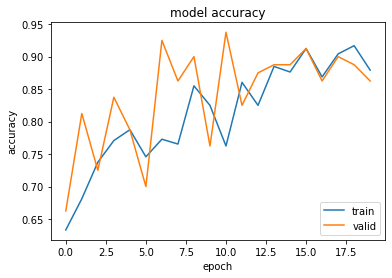

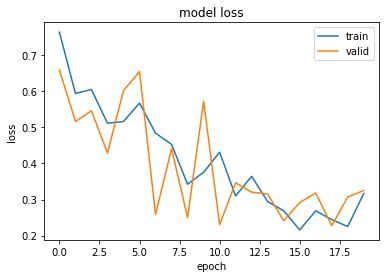

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import TensorBoard


epochs = 10
name = f"Sandro_Conv_from_Scratch + {time.time()}"
tensorboard = TensorBoard(log_dir=f"logs/{name}")
batch_size = 20

history = model_tuner.fit(
    train_generator,
    steps_per_epoch = num_train_images // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = num_valid_images // batch_size,
    callbacks = tensorboard)


In [ ]:
#C:\Users\daveb\switchdrive>tensorboard --logdir=logs


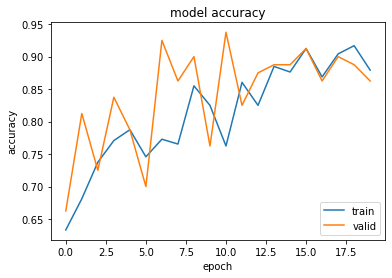

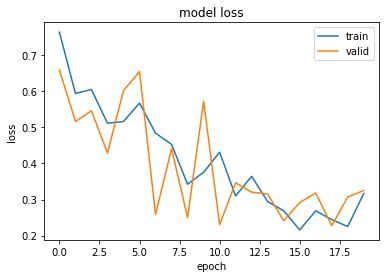

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()